**Yaşam Beklentisi Veri Seti İnceleme**

*152120211090 Emre Güner
152120211094 Cihan Bekem*

#**Veriye Genel Bakış**

**GEREKLİ KÜTÜPHANELERİN IMPORT EDİLMESİ**

In [1]:
# Loading libraries
import seaborn as sns
import pandas as pd
import csv
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

**Verinin Okunması**

In [2]:
life_exp  = pd.read_csv("/content/Life Expectancy Data.csv") # Data reading has been performed
df = life_exp.copy() # We are making a copy to preserve the original data

In [3]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numeric, and categorical but cardinal variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numeric but categorical variables
        car_th: int, optinal
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numeric variables
        cat_but_car: list
                List of categorical-looking cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is within cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat


cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df) # Let's use the 'grab_col_names' function to examine the categories of our variables and classify them.
print("cat cols: ", cat_cols)
print("num_cols: ", num_cols)
print("cat_but_car: ", cat_but_car)
print("num_but_cat" ,num_but_cat)


Observations: 2938
Variables: 22
cat_cols: 1
num_cols: 20
cat_but_car: 1
num_but_cat: 0
cat cols:  ['Status']
num_cols:  ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
cat_but_car:  ['Country']
num_but_cat []


**Her bir ülke benzersiz bir değere sahiptir ve bir ülkenin diğerinden "büyük" veya "küçük" olması gibi bir sıralama yapmak mantıklı değildir. Dolayısıyla, "Country" değişkeninin kardinal bir değişken olarak da sınıflandırabiliriz.**

In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [7]:
df.tail()

Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[5 rows x 22 columns]

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df.describe(include="all").T

count unique          top  freq  \
Country                            2938    193  Afghanistan    16   
Year                             2938.0    NaN          NaN   NaN   
Status                             2938      2   Developing  2426   
Life expectancy                  2928.0    NaN          NaN   NaN   
Adult Mortality                  2928.0    NaN          NaN   NaN   
infant deaths                    2938.0    NaN          NaN   NaN   
Alcohol                          2744.0    NaN          NaN   NaN   
percentage expenditure           2938.0    NaN          NaN   NaN   
Hepatitis B                      2385.0    NaN          NaN   NaN   
Measles                          2938.0    NaN          NaN   NaN   
 BMI                             2904.0    NaN          NaN   NaN   
under-five deaths                2938.0    NaN          NaN   NaN   
Polio                            2919.0    NaN          NaN   NaN   
Total expenditure                2712.0    NaN          NaN   NaN   
Diphtheria                       2919.0    NaN          NaN   NaN   
 HIV/AIDS                        2938.0    NaN          NaN   NaN   
GDP                              2490.0    NaN          NaN   NaN   
Population                       2286.0    NaN          NaN   NaN   
 thinness  1-19 years            2904.0    NaN          NaN   NaN   
 thinness 5-9 years              2904.0    NaN          NaN   NaN   
Income composition of resources  2771.0    NaN          NaN   NaN   
Schooling                        2775.0    NaN          NaN   NaN   

                                            mean              std      min  \
Country                                      NaN              NaN      NaN   
Year                                  2007.51872         4.613841   2000.0   
Status                                       NaN              NaN      NaN   
Life expectancy                        69.224932         9.523867     36.3   
Adult Mortality                       164.796448       124.292079      1.0   
infant deaths                          30.303948       117.926501      0.0   
Alcohol                                 4.602861         4.052413     0.01   
percentage expenditure                738.251295      1987.914858      0.0   
Hepatitis B                            80.940461        25.070016      1.0   
Measles                               2419.59224     11467.272489      0.0   
 BMI                                   38.321247        20.044034      1.0   
under-five deaths                      42.035739       160.445548      0.0   
Polio                                  82.550188        23.428046      3.0   
Total expenditure                        5.93819          2.49832     0.37   
Diphtheria                             82.324084        23.716912      2.0   
 HIV/AIDS                               1.742103         5.077785      0.1   
GDP                                  7483.158469     14270.169342  1.68135   
Population                       12753375.120052  61012096.508428     34.0   
 thinness  1-19 years                   4.839704         4.420195      0.1   
 thinness 5-9 years                     4.870317         4.508882      0.1   
Income composition of resources         0.627551         0.210904      0.0   
Schooling                              11.992793          3.35892      0.0   

                                        25%          50%          75%  \
Country                                 NaN          NaN          NaN   
Year                                 2004.0       2008.0       2012.0   
Status                                  NaN          NaN          NaN   
Life expectancy                        63.1         72.1         75.7   
Adult Mortality                        74.0        144.0        228.0   
infant deaths                           0.0          3.0         22.0   
Alcohol                              0.8775        3.755       7.7025   
percentage expenditure             4.685343    64.912906   441.5341

In [10]:
df.describe(include="object")

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [11]:
# Convert to categorical
df['Country'] = pd.Categorical(df['Country'])
df['Status'] = pd.Categorical(df['Status'])
print(df.dtypes)

# Nesne sütunlarını Kategorik'e dönüştürerek verilerimizi hem bellek hem de hesaplama açısından daha verimli hale getiririz.
# Özellikle kategorik verilerle uğraşırken genellikle daha net ve daha doğru veri temsillerine yol açar.

Country                            category
Year                                  int64
Status                             category
Life expectancy                     float64
Adult Mortality                     float64
infant deaths                         int64
Alcohol                             float64
percentage expenditure              float64
Hepatitis B                         float64
Measles                               int64
 BMI                                float64
under-five deaths                     int64
Polio                               float64
Total expenditure                   float64
Diphtheria                          float64
 HIV/AIDS                           float64
GDP                                 float64
Population                          float64
 thinness  1-19 years               float64
 thinness 5-9 years                 float64
Income composition of resources     float64
Schooling                           float64
dtype: object


#**VERİ GÖRSELLEŞTİRME**

**KATEGORİK VERİLERİN GRAFİKLERİ**

            Status      Ratio
Status                       
Developing    2426  82.573179
Developed      512  17.426821
##########################################


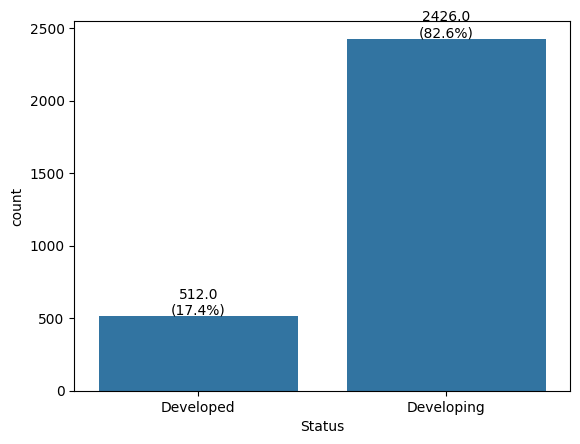

In [12]:
import matplotlib.pyplot as plt
# ANALYSIS OF CATEGORICAL VARIABLES
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        ax = sns.countplot(x=dataframe[col_name], data=dataframe)
        # Annotate the bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}\n({height / len(dataframe) * 100:.1f}%)',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 10),
                        textcoords='offset points')
        plt.show(block=True)
for col in cat_cols:
    cat_summary(df, col, plot=True)

Görüldüğü üzere veri setimizde tek bir kategorik değer var. Gelişmiş ülkeler, gelişmekte olan ülkelerden daha az sayıda.

**Ülkelere göre ortalama yaşam beklentisi**

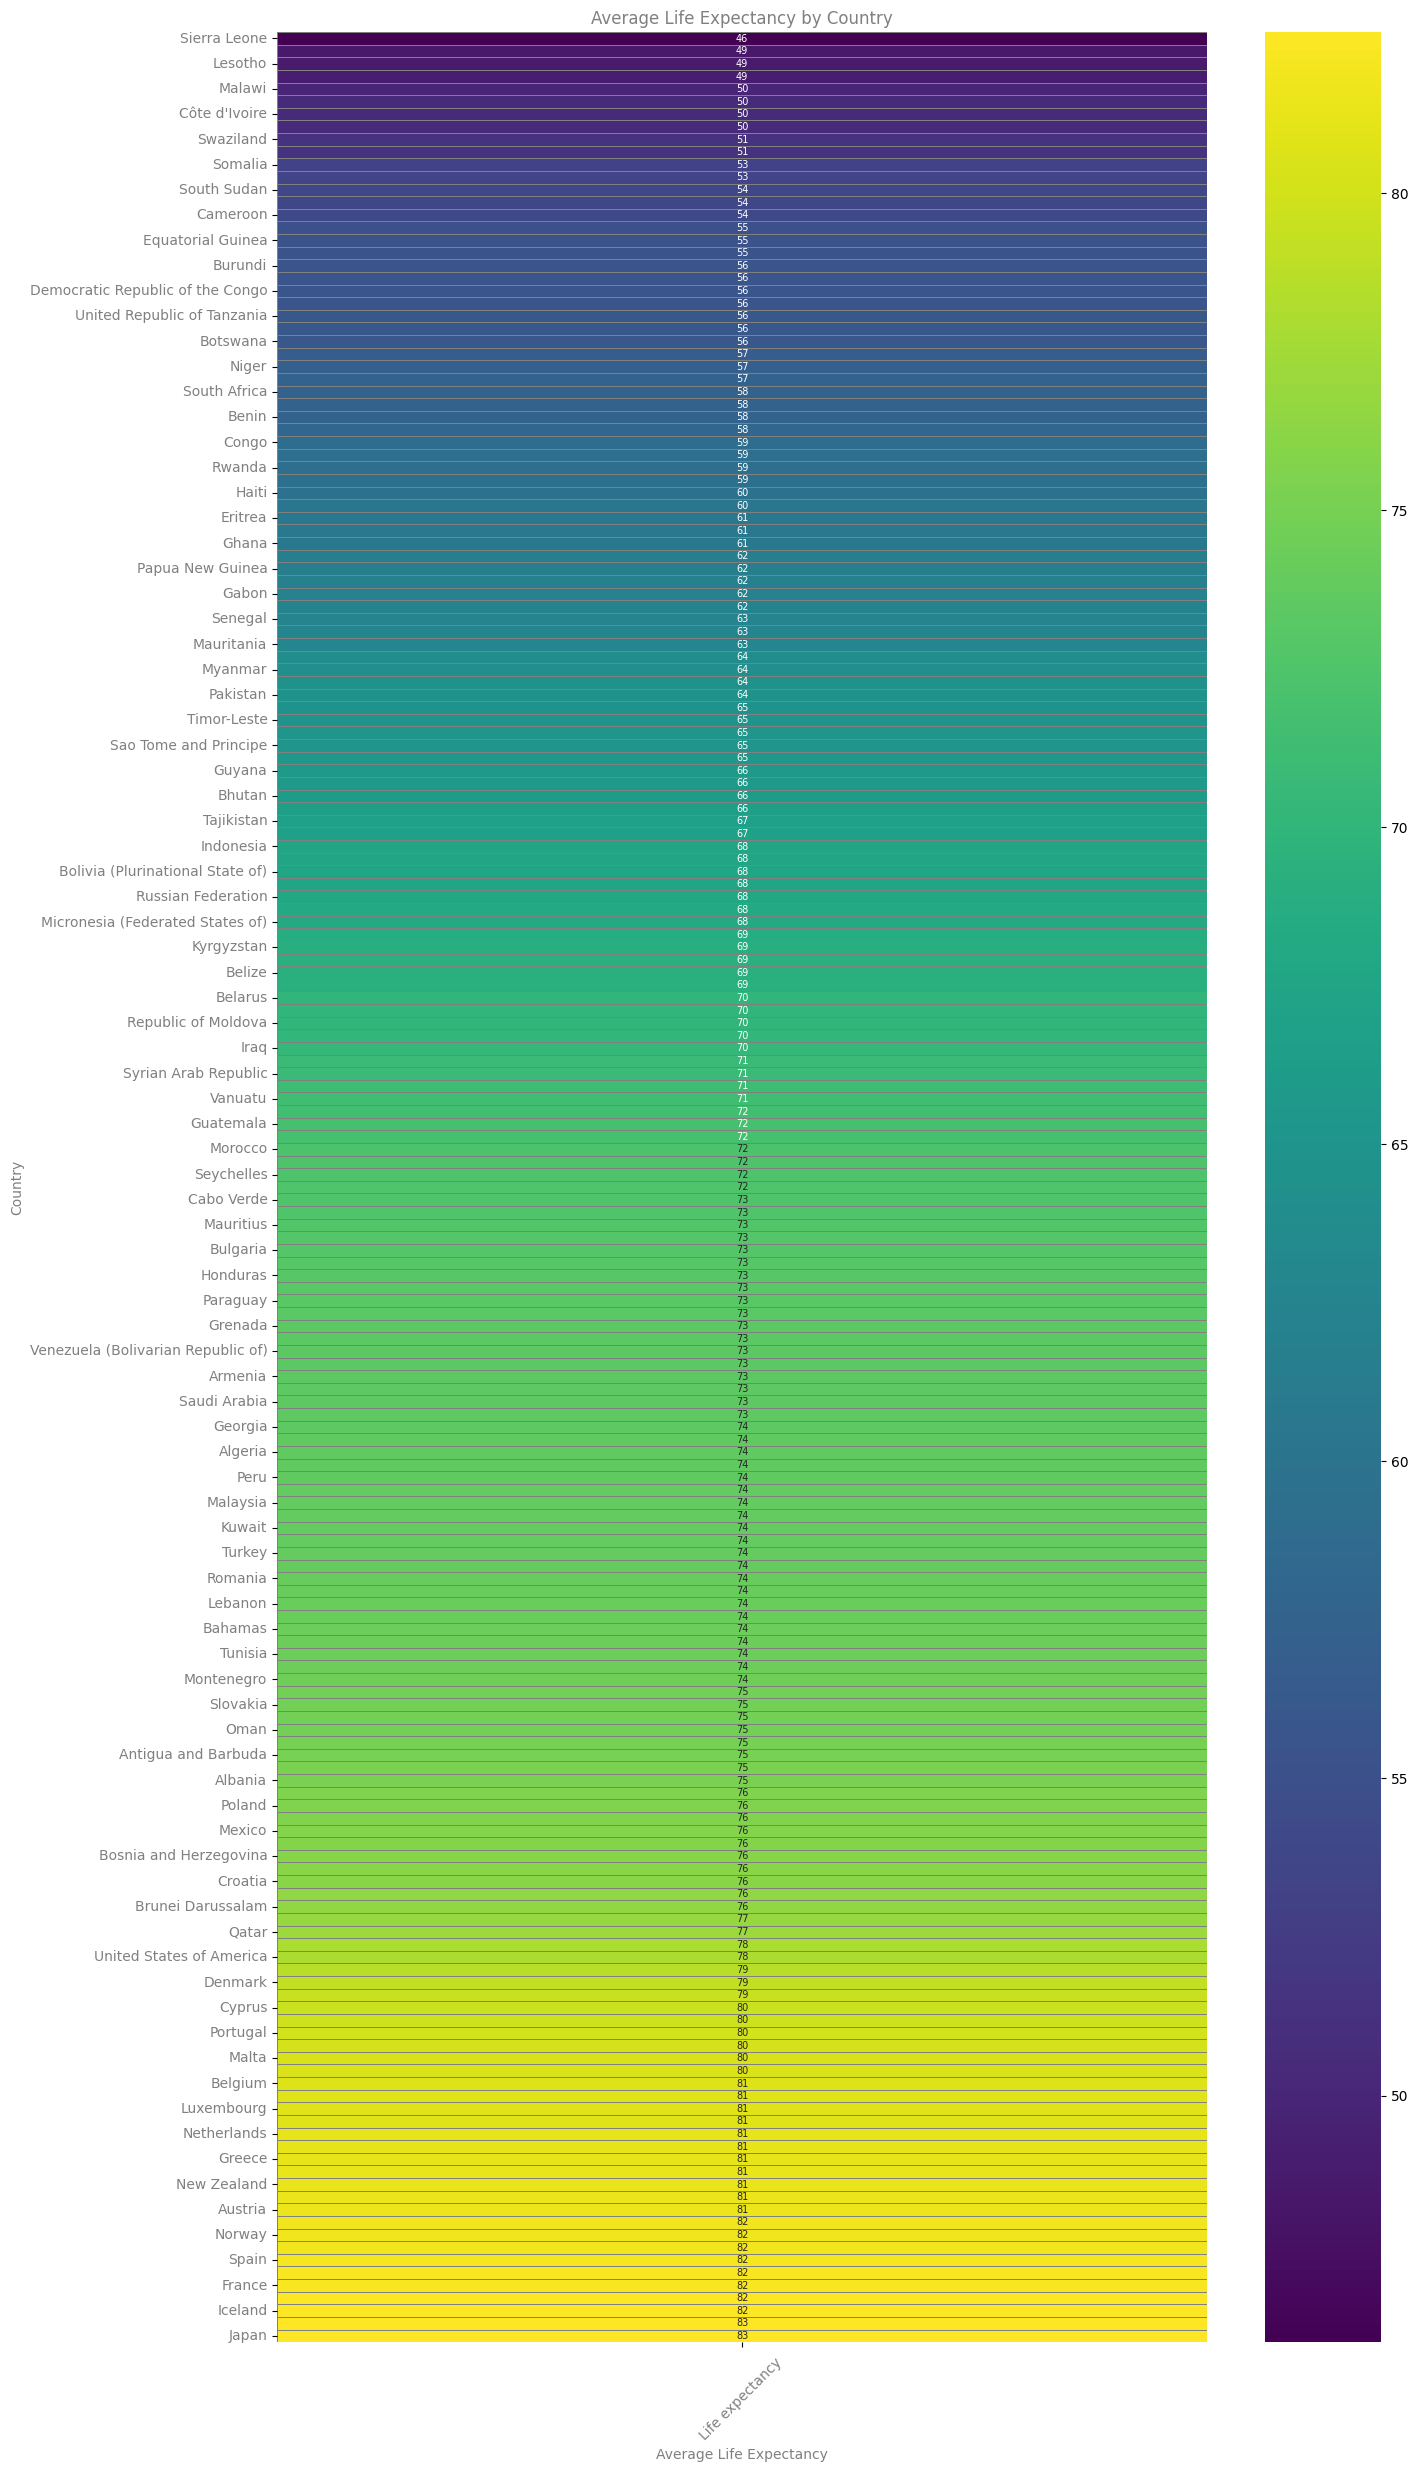

In [13]:
palette = sns.color_palette("viridis", as_cmap=True)

country_life_expectancy = df.pivot_table(values='Life expectancy ', index='Country', aggfunc='mean')

# Veriyi sıralama
country_life_expectancy = df.pivot_table(values='Life expectancy ', index='Country', aggfunc='mean').sort_values(by='Life expectancy ')

# Görselleştirme
plt.figure(figsize=(15, 30))
sns.heatmap(country_life_expectancy, annot=True, cmap=palette, cbar=True, linewidths=.5, linecolor='gray', annot_kws={"size": 7})
plt.title('Average Life Expectancy by Country', color='gray')
plt.xlabel('Average Life Expectancy', color='gray')
plt.ylabel('Country', color='gray')
plt.xticks(color='gray', rotation=45)
plt.yticks(color='gray', rotation=0)
plt.show()

**Gelişmiş ve Gelişmekte Olan ülkelerdeki yaşam beklentisi dağılımları**

In [14]:
!pip install plotly

In [15]:
fig=px.violin(df,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

Gelişmiş ülkelerde yaşam beklentisinin 70 ile 80 yaş arasında yoğunlaştığını görüyoruz Gelişmekte olan ülkelerde ise yaşam beklentisinin 50 ile 70 yaş arasında değiştiğini, fakat bazı verilerin 30'lu yaşlara kadar düştüğünü görüyoruz.

Grafik, gelişmiş ülkelerin yaşam beklentisinin gelişmekte olan ülkelere göre genellikle daha yüksek ve daha dar bir aralıkta toplandığını açıkça göstermektedir. Bu da, gelişmiş ülkelerdeki yaşam standartlarının ve sağlık hizmetlerinin genel olarak daha iyi olduğunu düşündürebilir.

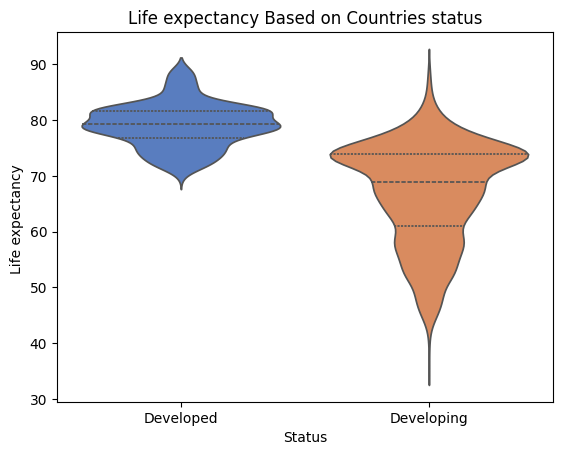

In [16]:
sns.violinplot(data=df, x='Status', y='Life expectancy ', palette='muted', inner='quartile')
plt.title('Life expectancy Based on Countries status')
plt.show()

**NUMERIC DEĞERLERİN GRAFİKLERİ**

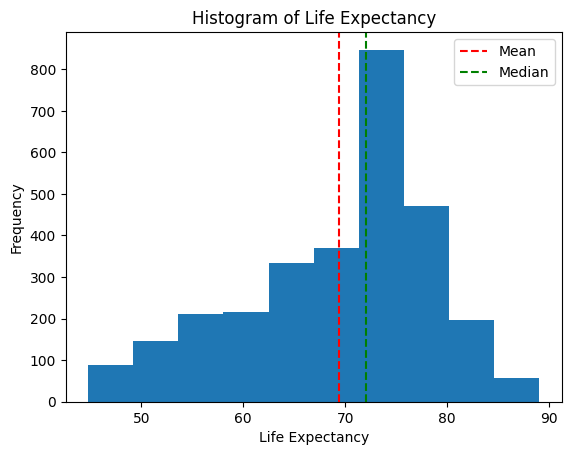

Mean Life Expectancy: 69.34242658847512
Median Life Expectancy: 72.0


In [47]:
import numpy as np

life_expectancy = df['Life expectancy ']

mean_life_expectancy = np.mean(life_expectancy)
median_life_expectancy = np.median(life_expectancy)

plt.hist(life_expectancy, bins=10)

plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

plt.axvline(mean_life_expectancy, color='r', linestyle='--', label='Mean')
plt.axvline(median_life_expectancy, color='g', linestyle='--', label='Median')

plt.legend()
plt.show()

print("Mean Life Expectancy:", mean_life_expectancy)
print("Median Life Expectancy:", median_life_expectancy)

Medyan, sıralanmış bir yaşam beklentisi değerleri listesindeki orta değerdir. Verinin üst yarısını alt yarısından ayıran değeri temsil eder. Medyan, uç değerlere veya aşırı değerlere daha az duyarlıdır ve merkezi eğilimin daha sağlam bir ölçüsünü sağlar. Ortalama, veri kümesindeki tüm bireyler için ortalama yaşam beklentisini temsil eder. Ortalama, uç değerlere veya aşırı değerlere duyarlıdır.

Medyan ve ortalama birbirine yakın değerlerdedir, bu da yaşam beklentisi değerlerinin dağılımının nispeten simetrik olduğunu düşündürür.


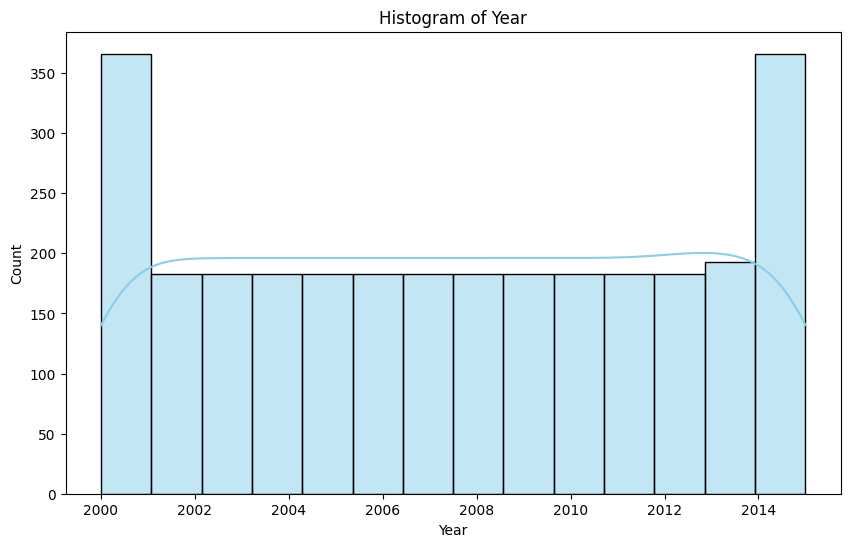

Summary statistics for Year:
count    2938.000000
mean     2007.518720
std         4.613841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: Year, dtype: float64


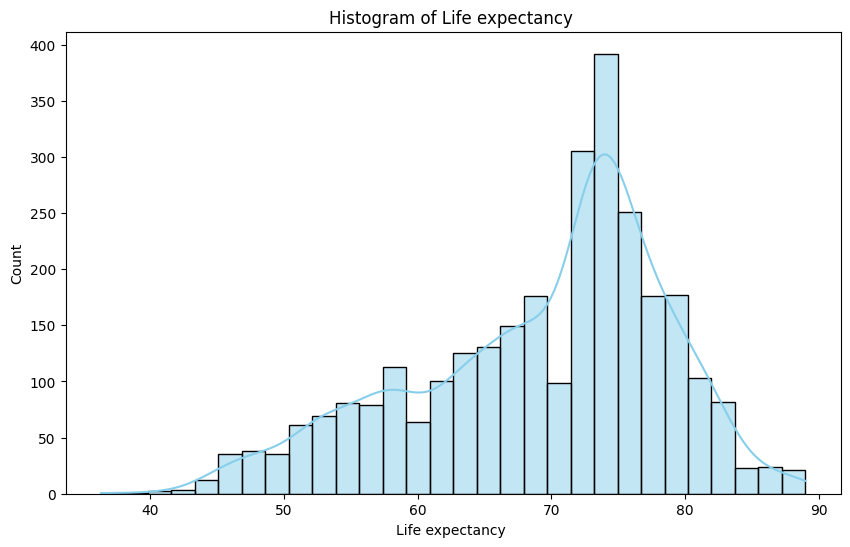

Summary statistics for Life expectancy :
count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


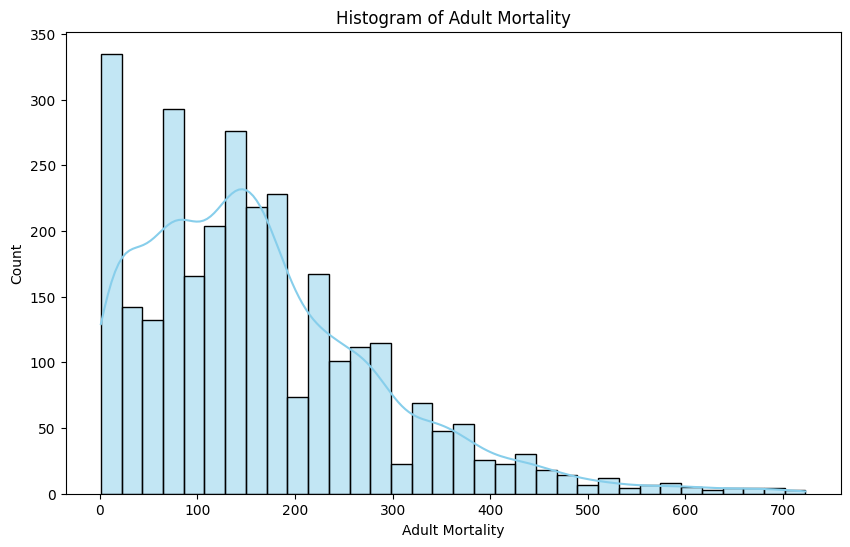

Summary statistics for Adult Mortality:
count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64


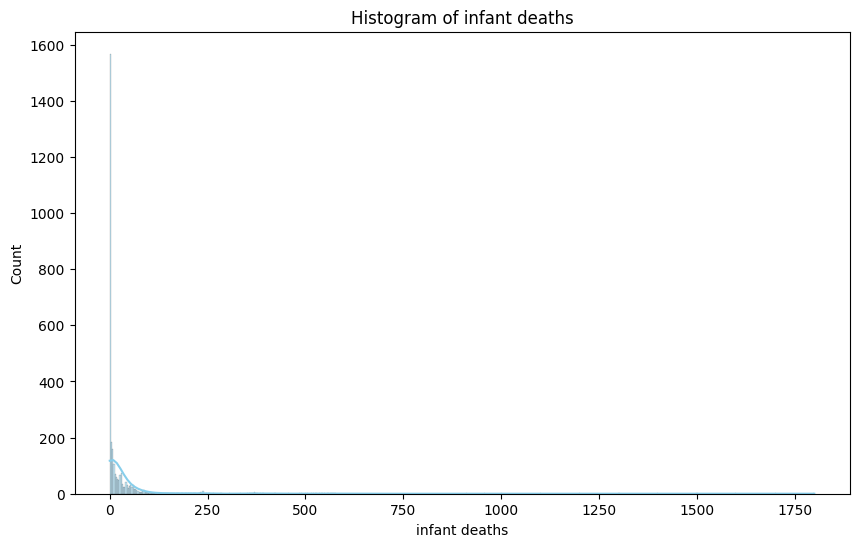

Summary statistics for infant deaths:
count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.000000
max      1800.000000
Name: infant deaths, dtype: float64


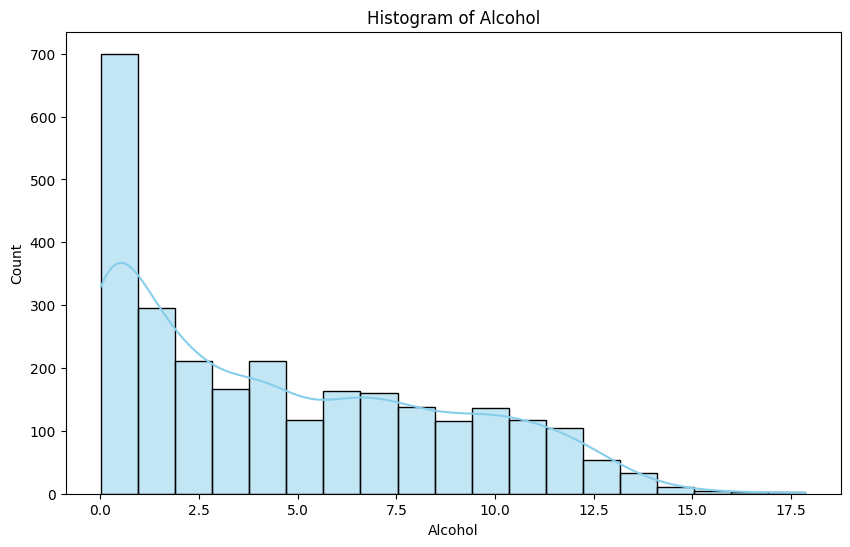

Summary statistics for Alcohol:
count    2744.000000
mean        4.602861
std         4.052413
min         0.010000
25%         0.877500
50%         3.755000
75%         7.702500
max        17.870000
Name: Alcohol, dtype: float64


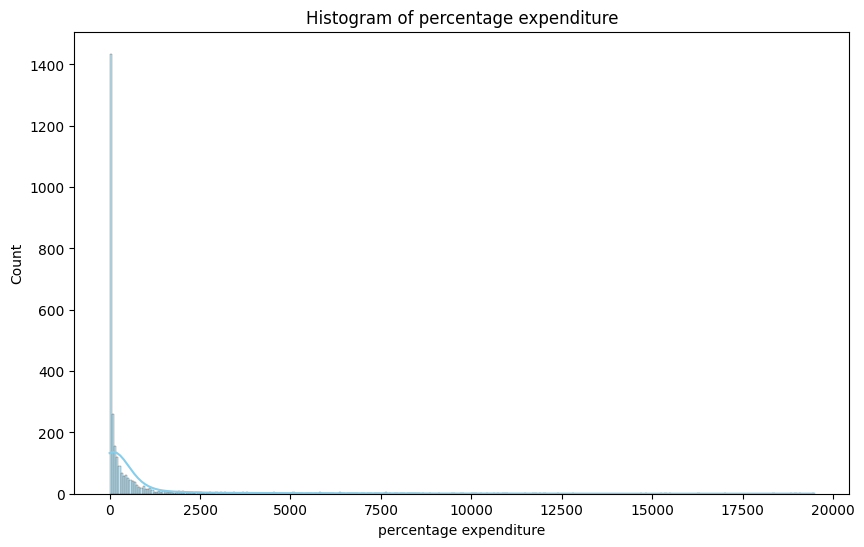

Summary statistics for percentage expenditure:
count     2938.000000
mean       738.251295
std       1987.914858
min          0.000000
25%          4.685343
50%         64.912906
75%        441.534144
max      19479.911610
Name: percentage expenditure, dtype: float64


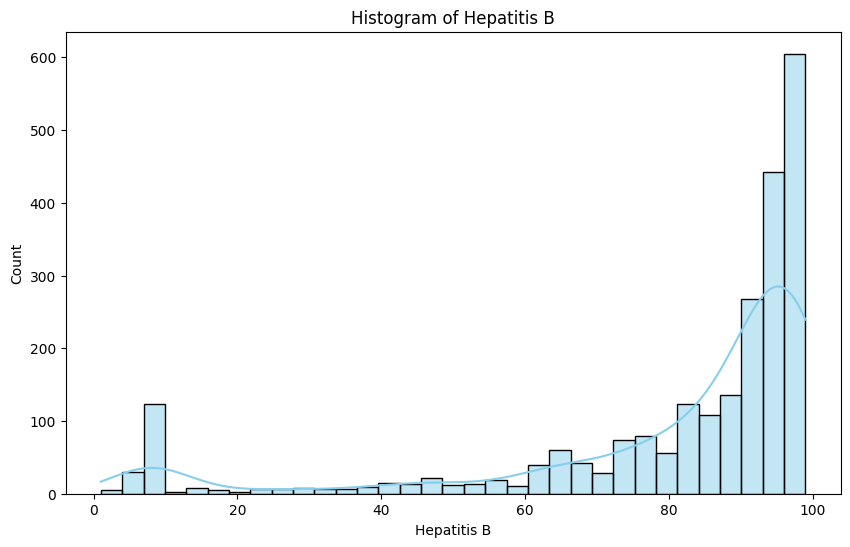

Summary statistics for Hepatitis B:
count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: Hepatitis B, dtype: float64


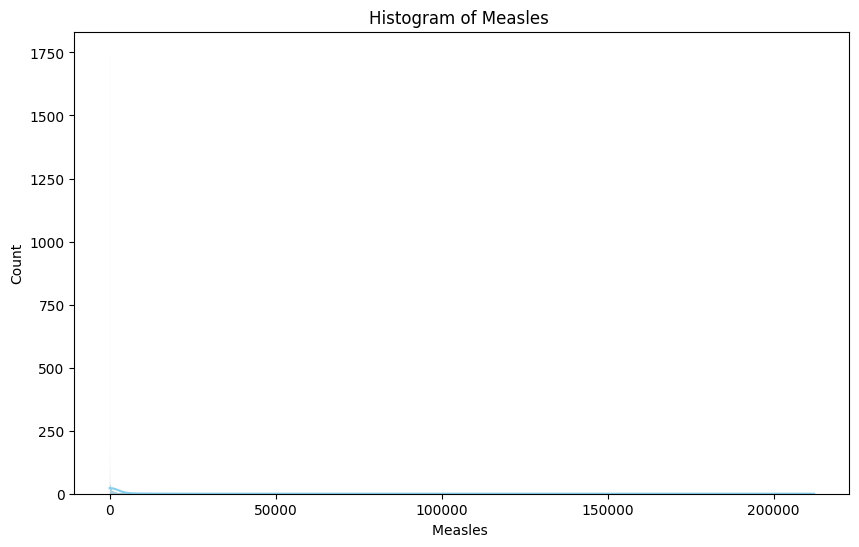

Summary statistics for Measles :
count      2938.000000
mean       2419.592240
std       11467.272489
min           0.000000
25%           0.000000
50%          17.000000
75%         360.250000
max      212183.000000
Name: Measles , dtype: float64


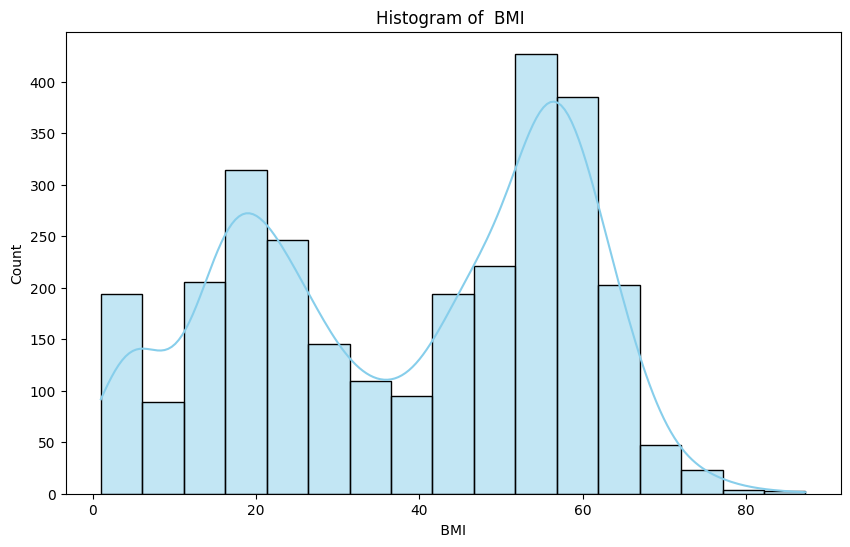

Summary statistics for  BMI :
count    2904.000000
mean       38.321247
std        20.044034
min         1.000000
25%        19.300000
50%        43.500000
75%        56.200000
max        87.300000
Name:  BMI , dtype: float64


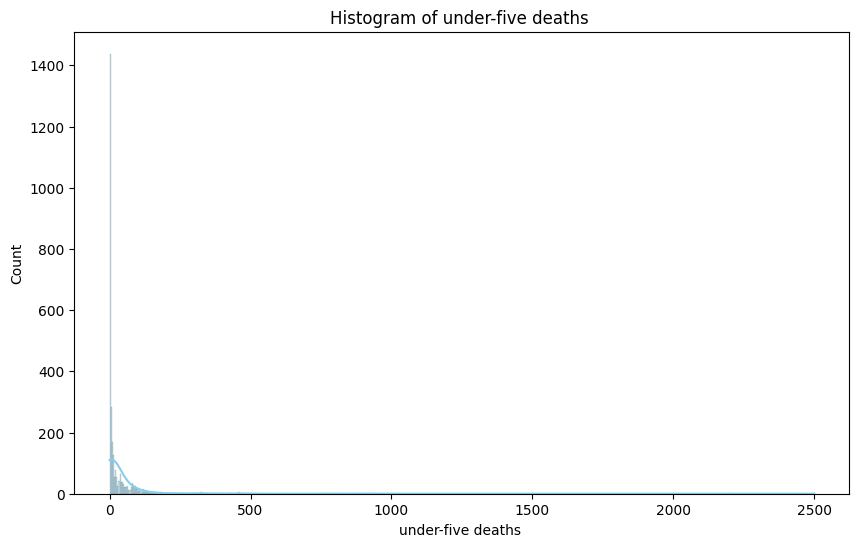

Summary statistics for under-five deaths :
count    2938.000000
mean       42.035739
std       160.445548
min         0.000000
25%         0.000000
50%         4.000000
75%        28.000000
max      2500.000000
Name: under-five deaths , dtype: float64


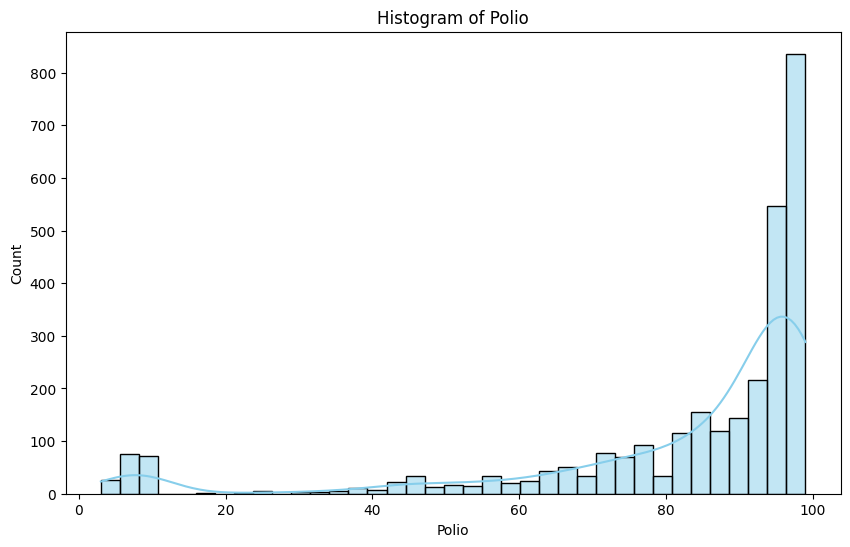

Summary statistics for Polio:
count    2919.000000
mean       82.550188
std        23.428046
min         3.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Polio, dtype: float64


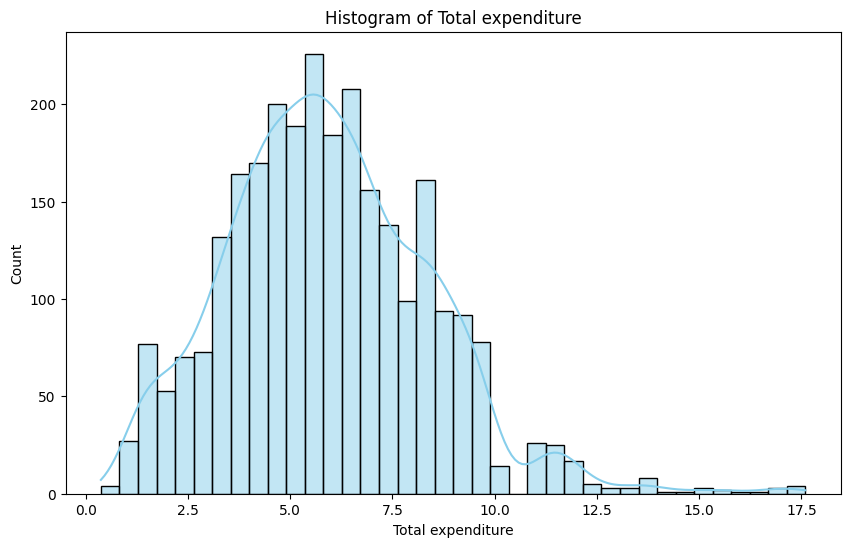

Summary statistics for Total expenditure:
count    2712.00000
mean        5.93819
std         2.49832
min         0.37000
25%         4.26000
50%         5.75500
75%         7.49250
max        17.60000
Name: Total expenditure, dtype: float64


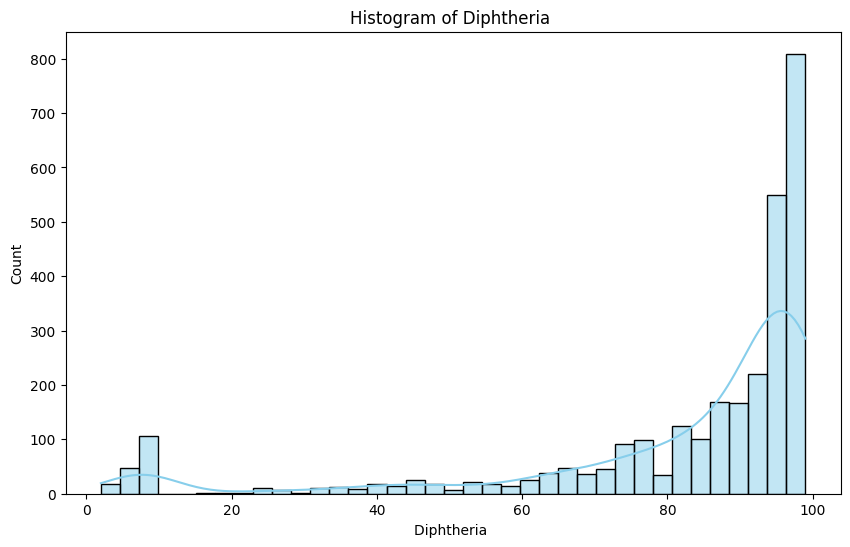

Summary statistics for Diphtheria :
count    2919.000000
mean       82.324084
std        23.716912
min         2.000000
25%        78.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: Diphtheria , dtype: float64


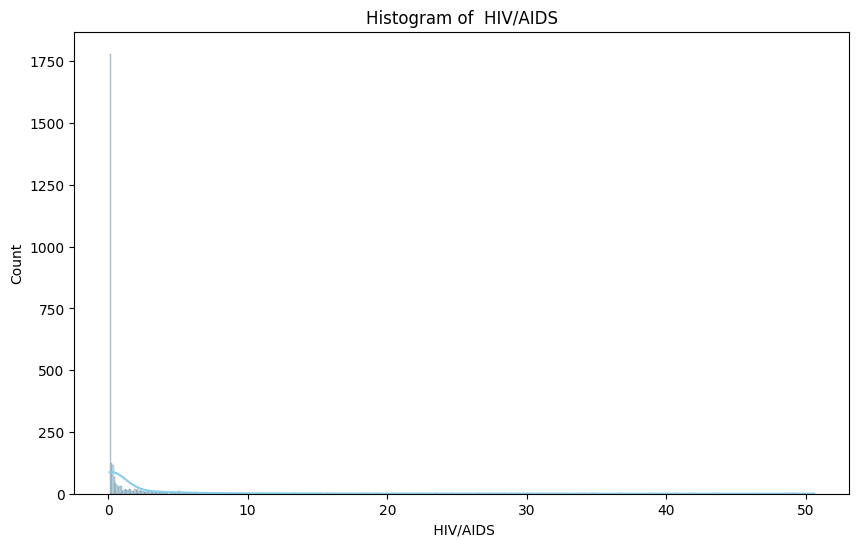

Summary statistics for  HIV/AIDS:
count    2938.000000
mean        1.742103
std         5.077785
min         0.100000
25%         0.100000
50%         0.100000
75%         0.800000
max        50.600000
Name:  HIV/AIDS, dtype: float64


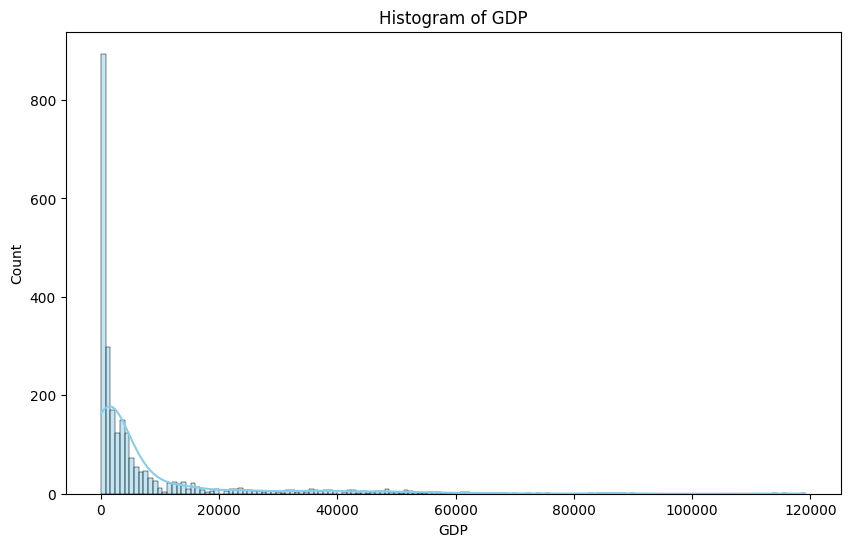

Summary statistics for GDP:
count      2490.000000
mean       7483.158469
std       14270.169342
min           1.681350
25%         463.935626
50%        1766.947595
75%        5910.806335
max      119172.741800
Name: GDP, dtype: float64


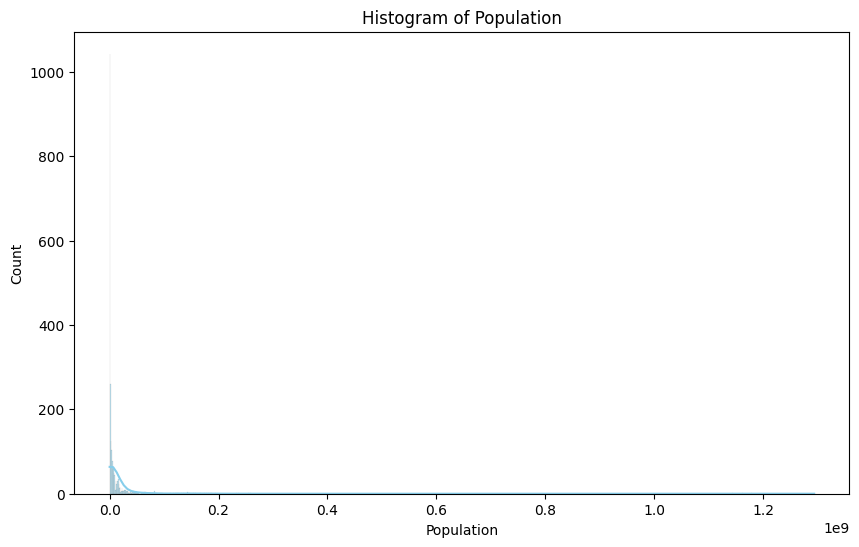

Summary statistics for Population:
count    2.286000e+03
mean     1.275338e+07
std      6.101210e+07
min      3.400000e+01
25%      1.957932e+05
50%      1.386542e+06
75%      7.420359e+06
max      1.293859e+09
Name: Population, dtype: float64


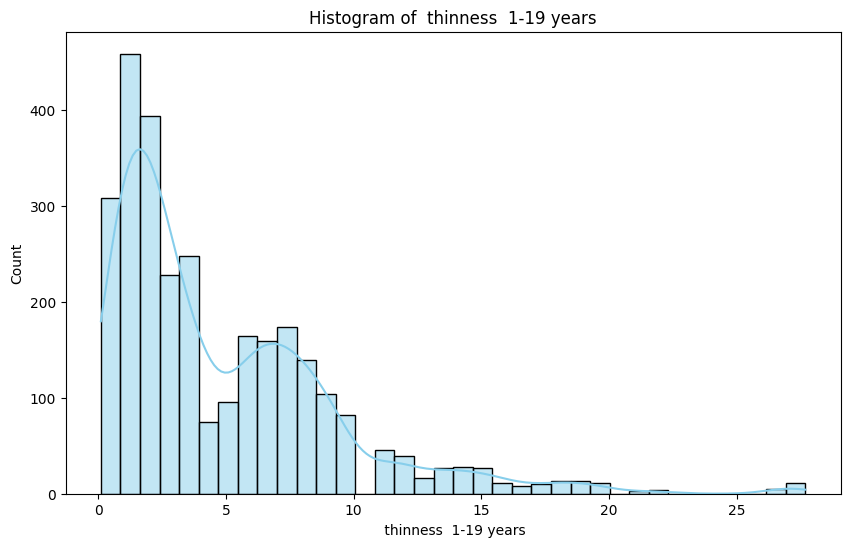

Summary statistics for  thinness  1-19 years:
count    2904.000000
mean        4.839704
std         4.420195
min         0.100000
25%         1.600000
50%         3.300000
75%         7.200000
max        27.700000
Name:  thinness  1-19 years, dtype: float64


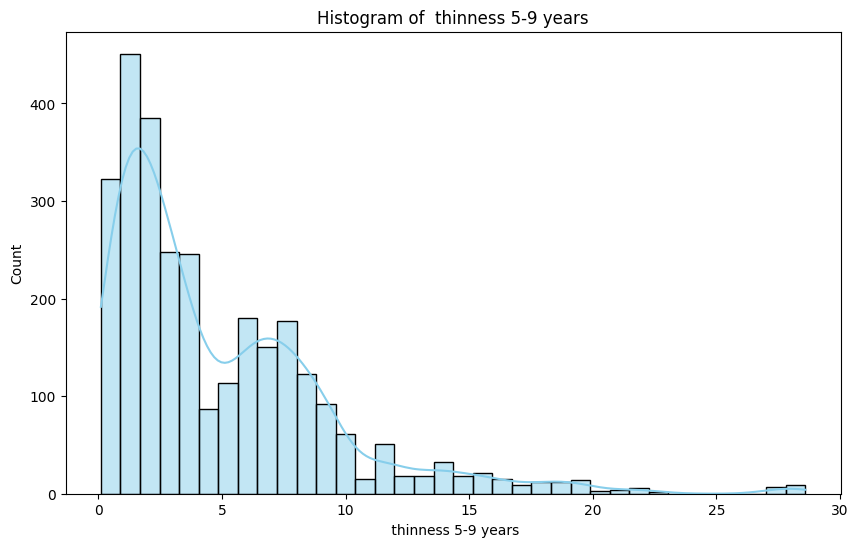

Summary statistics for  thinness 5-9 years:
count    2904.000000
mean        4.870317
std         4.508882
min         0.100000
25%         1.500000
50%         3.300000
75%         7.200000
max        28.600000
Name:  thinness 5-9 years, dtype: float64


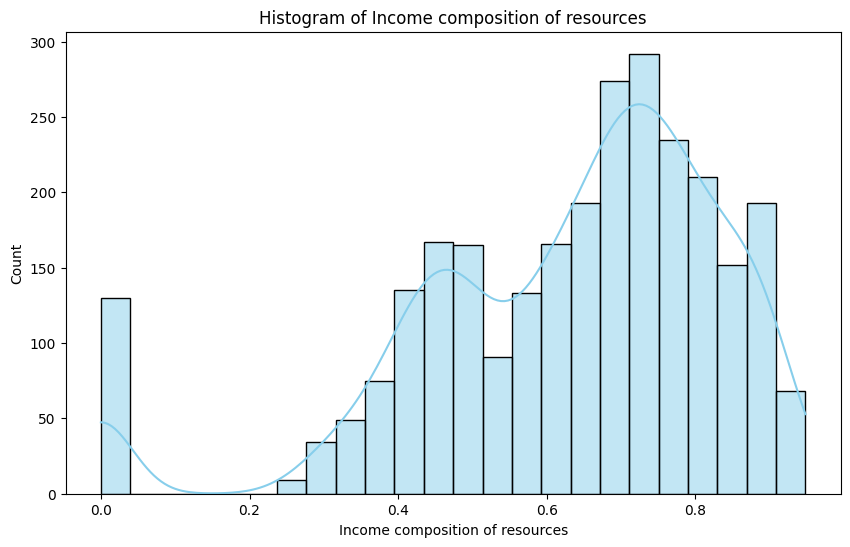

Summary statistics for Income composition of resources:
count    2771.000000
mean        0.627551
std         0.210904
min         0.000000
25%         0.493000
50%         0.677000
75%         0.779000
max         0.948000
Name: Income composition of resources, dtype: float64


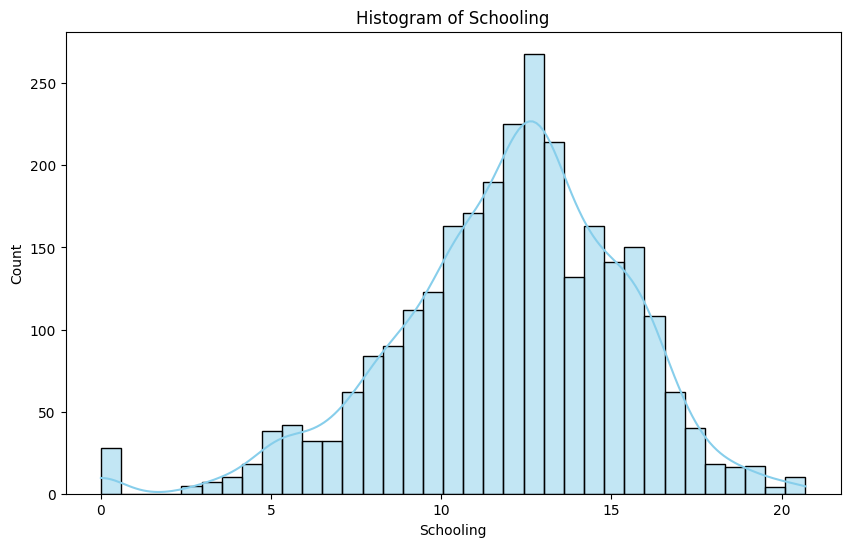

Summary statistics for Schooling:
count    2775.000000
mean       11.992793
std         3.358920
min         0.000000
25%        10.100000
50%        12.300000
75%        14.300000
max        20.700000
Name: Schooling, dtype: float64


In [18]:

# Function to plot numeric summaries
def num_summary(dataframe, col_name):
    plt.figure(figsize=(10, 6))

    # Histogram with KDE
    ax = sns.histplot(dataframe[col_name], kde=True, color='skyblue')
    plt.title(f'Histogram of {col_name}')

    # Annotate histogram
    hist_data = dataframe[col_name].dropna()
    for p in ax.patches:
        height = p.get_height()



    plt.show()

     # Print statistics
    print(f'Summary statistics for {col_name}:')
    print(dataframe[col_name].describe())


# Plotting numeric summaries
for col in num_cols:
    num_summary(df, col)


**BAĞIMLI DEĞİŞKENİN BAĞIMSIZ DEĞİŞKENLERLE ANALİZİ... Regresyon Çizgisi: Kırmızı çizgi, kendisi ile tüm noktalar arasındaki mesafeyi (hatayı) en aza indiren en uygun çizgi olan doğrusal regresyon çizgisini temsil eder.**

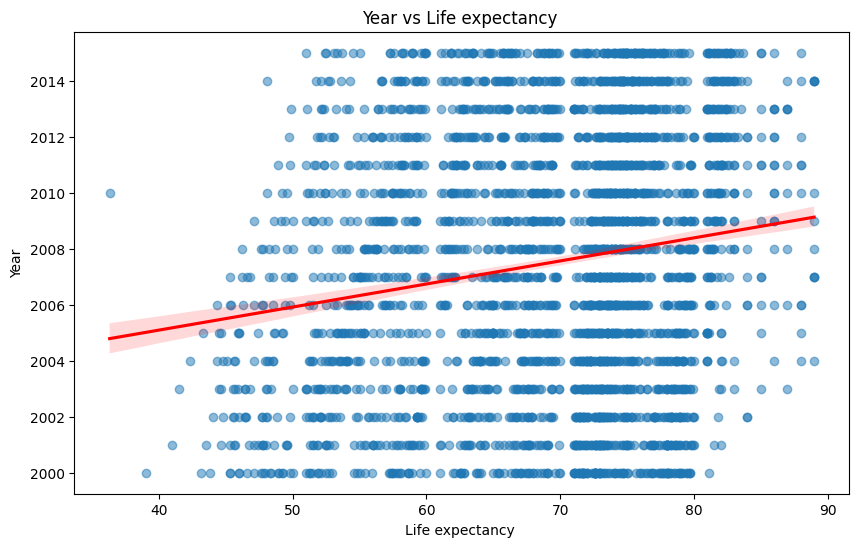

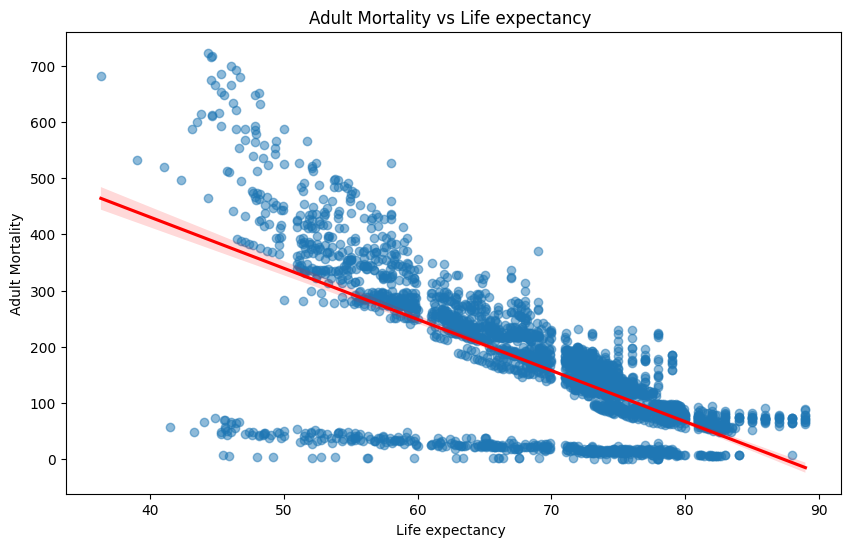

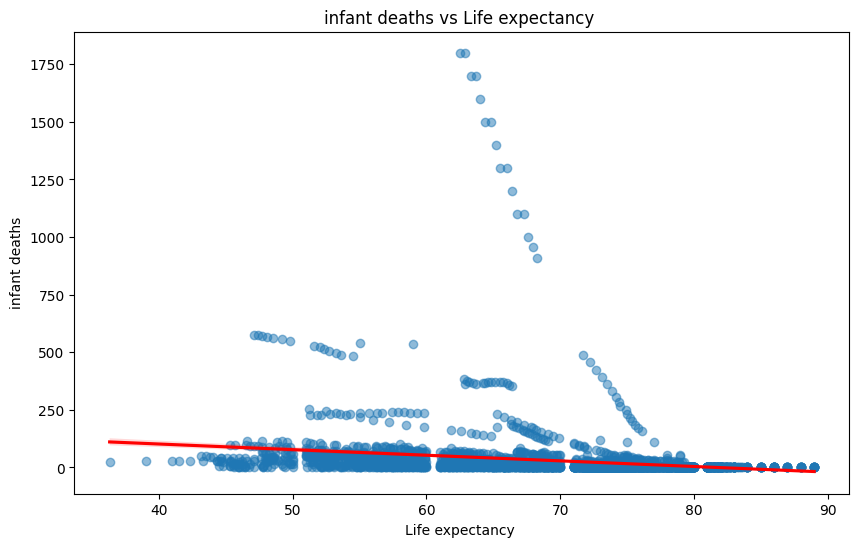

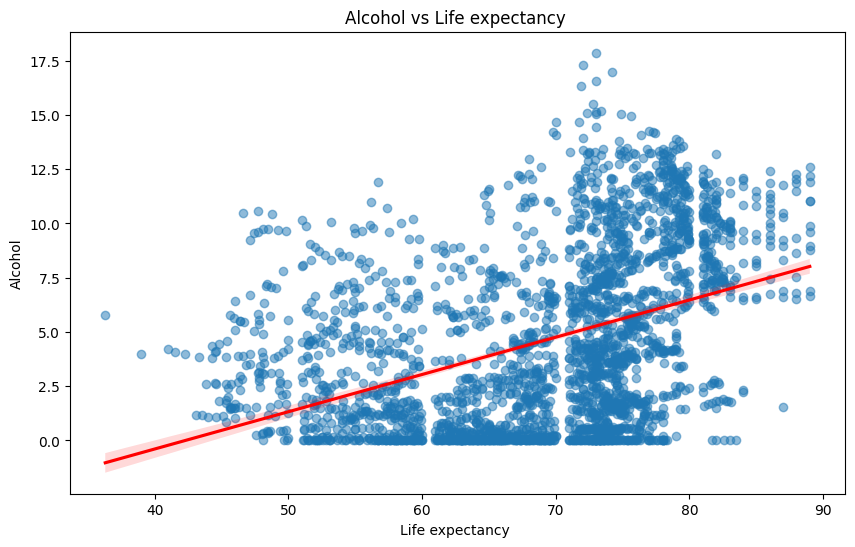

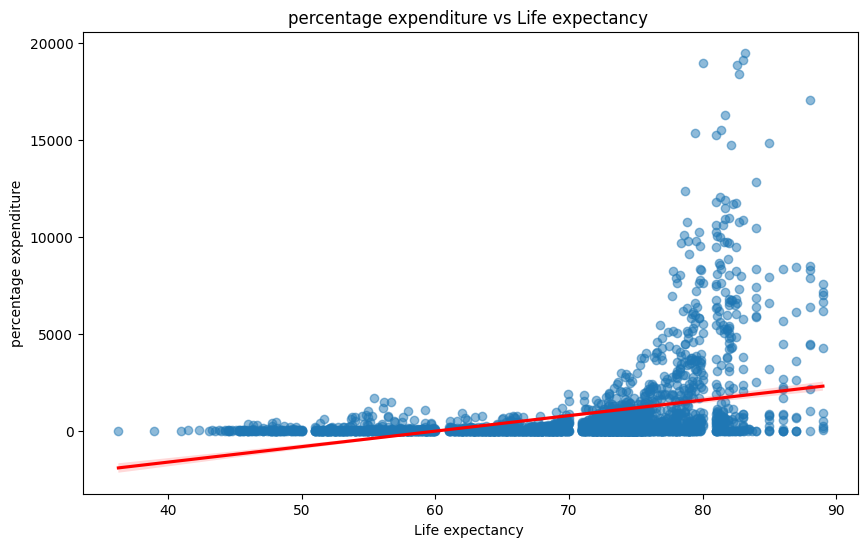

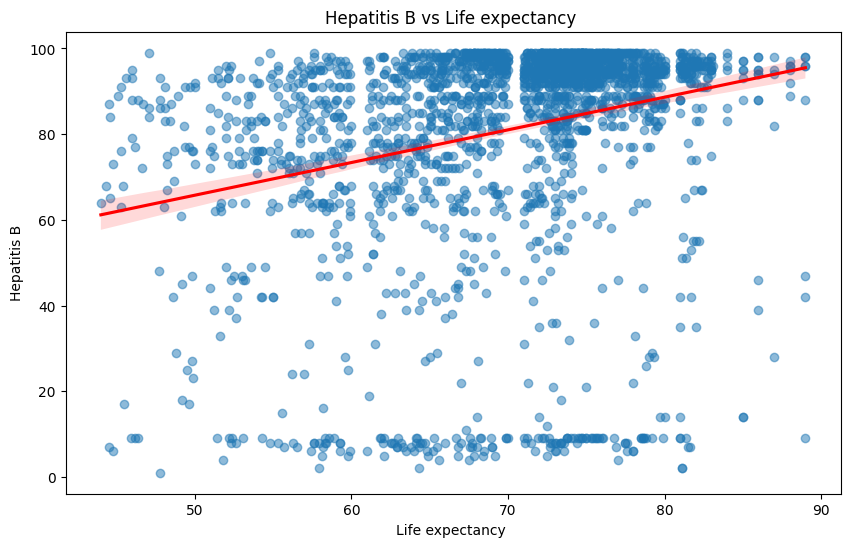

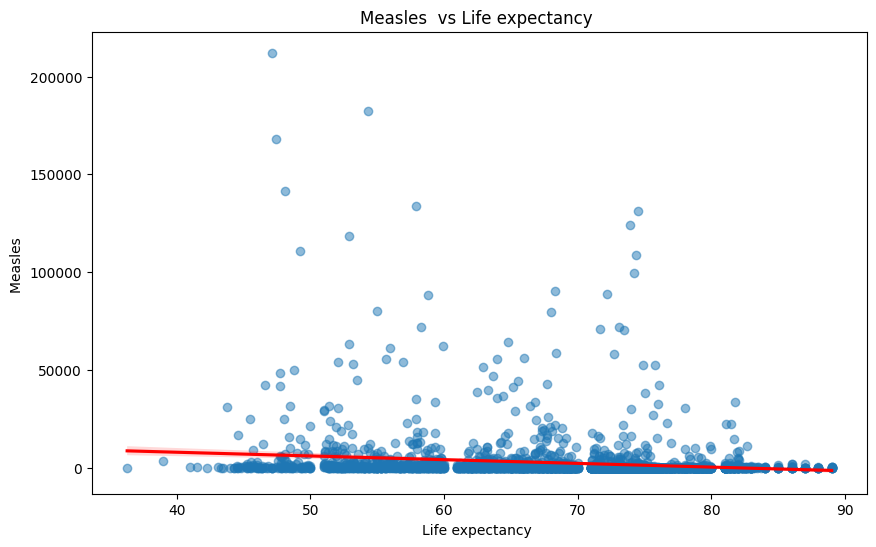

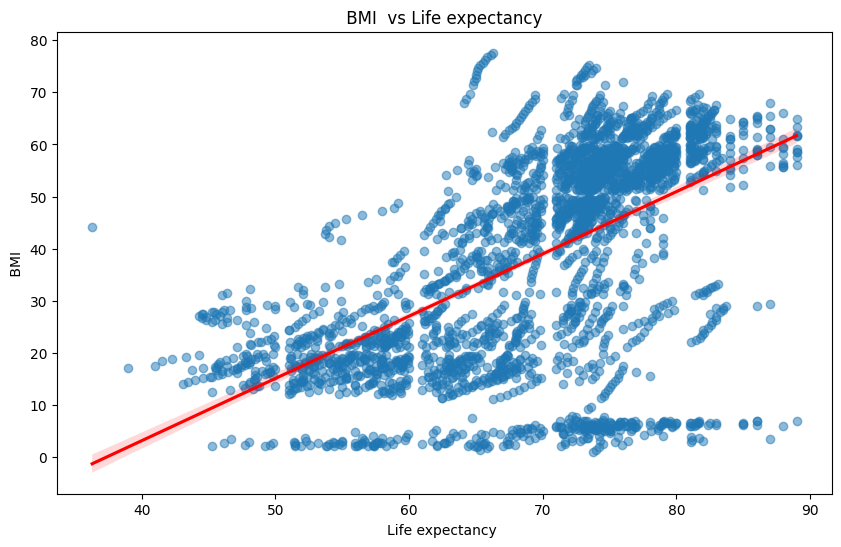

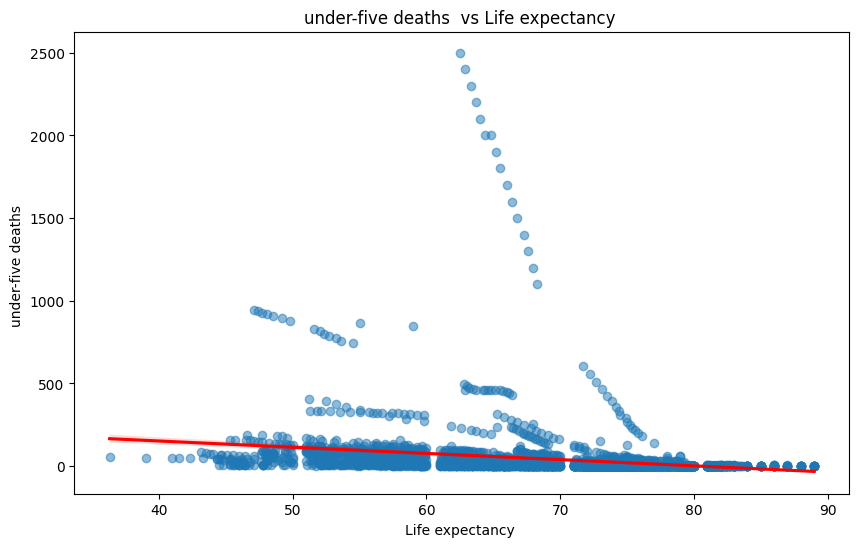

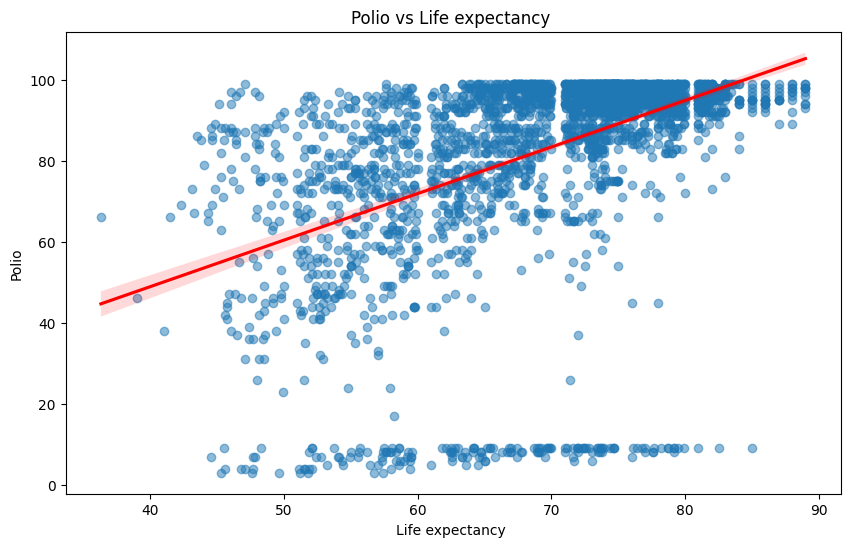

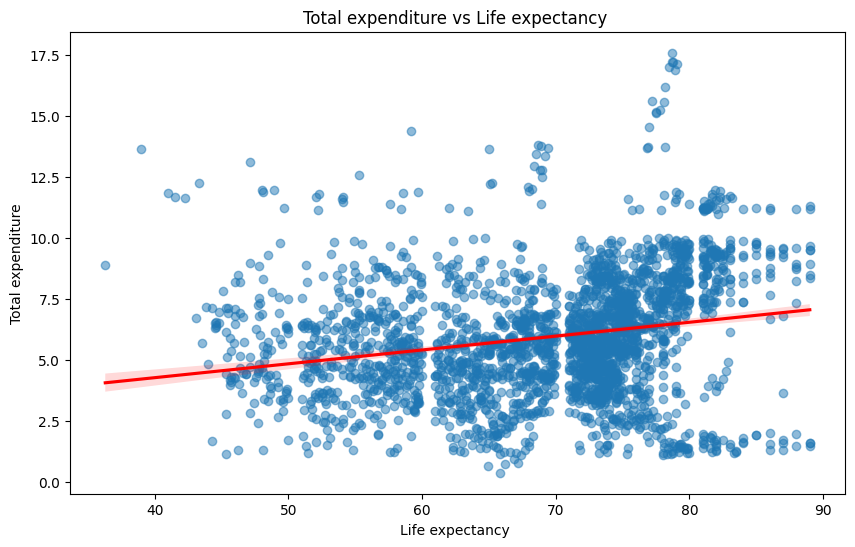

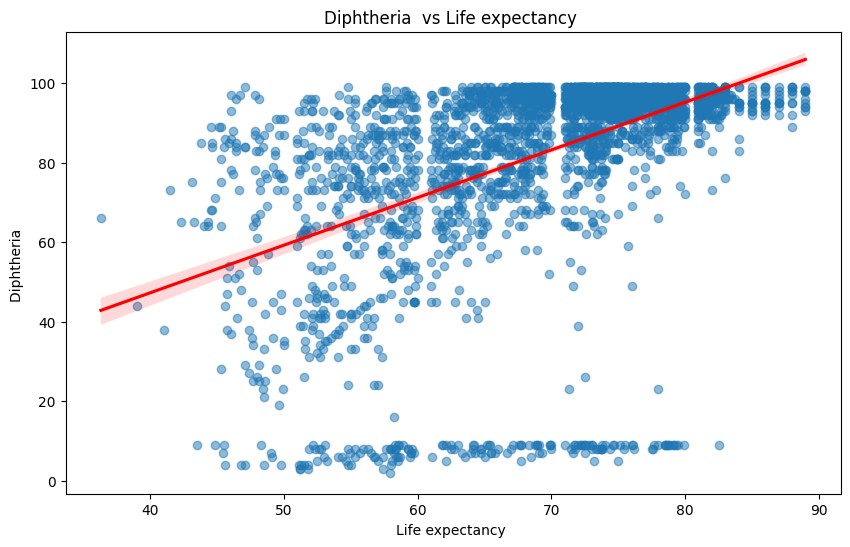

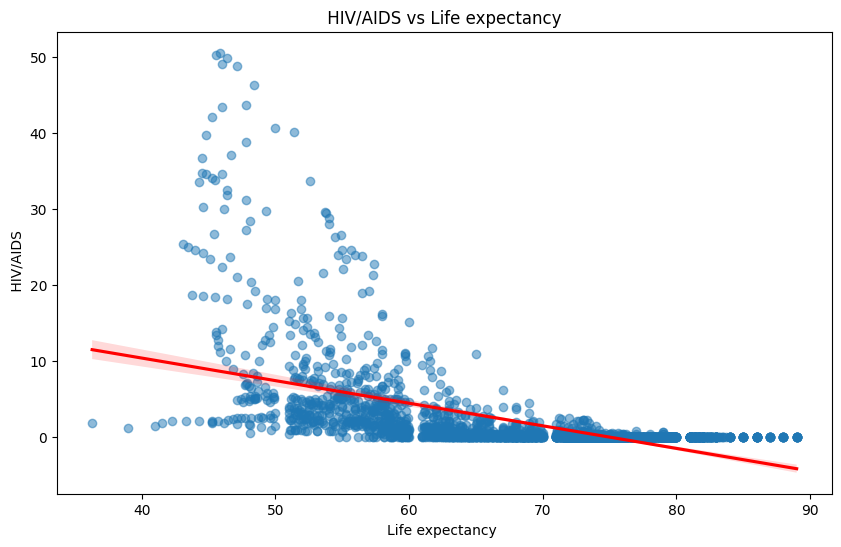

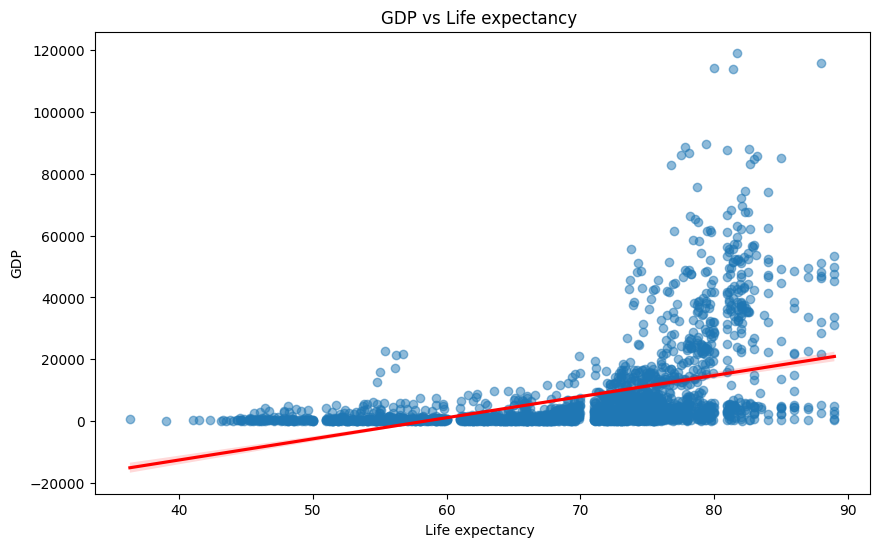

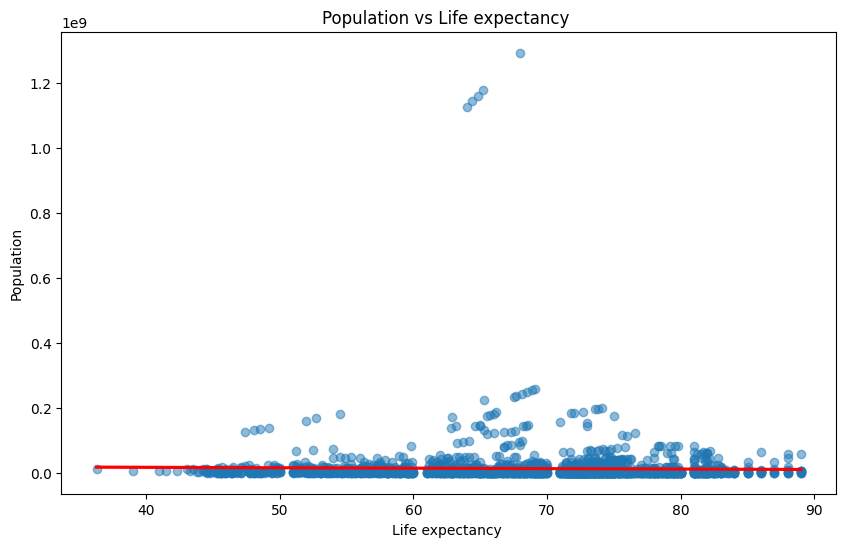

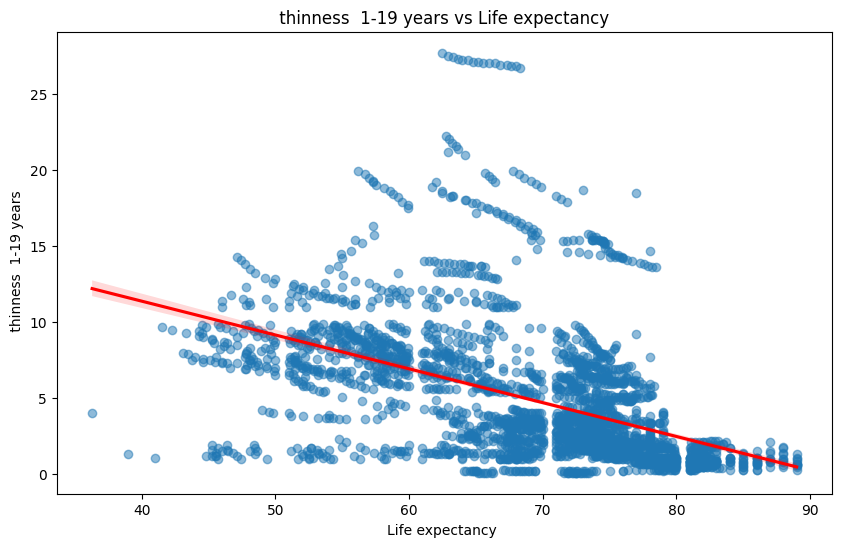

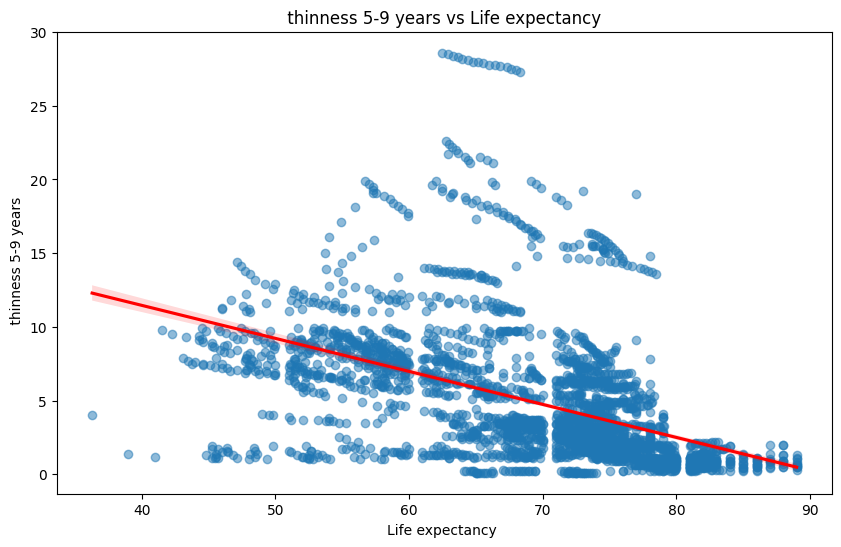

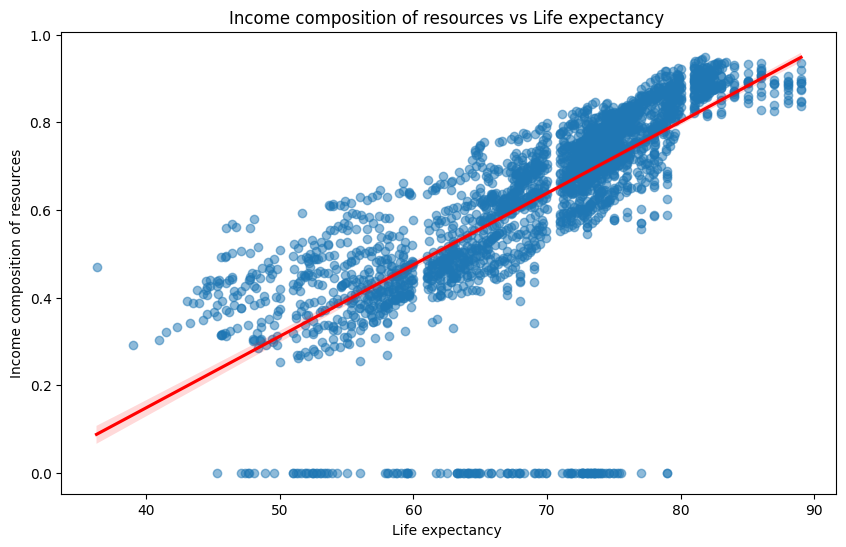

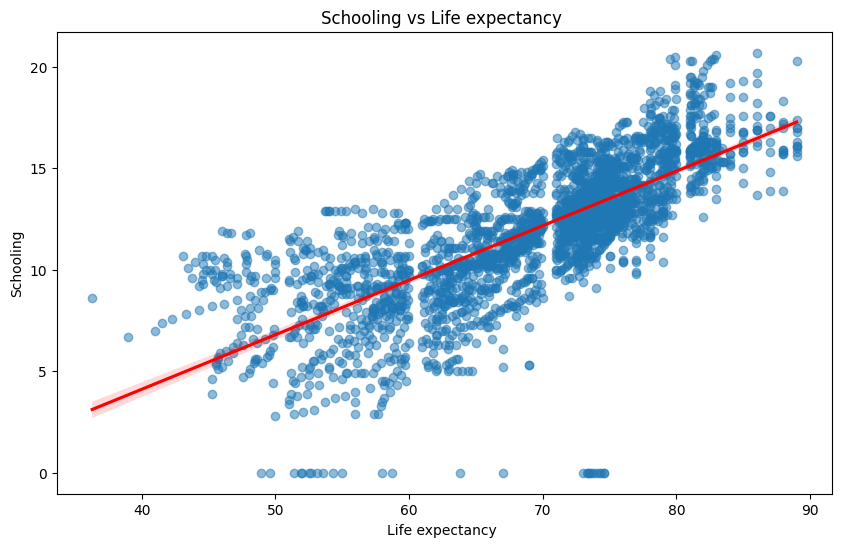

In [19]:
# Function to create scatter plots with regression lines
def scatter_plot_with_regression(dataframe, dep_var, indep_var):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=indep_var, y=dep_var, data=dataframe, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{dep_var} vs {indep_var}')
    plt.xlabel(indep_var)
    plt.ylabel(dep_var)
    plt.show()


# 'Life expectancy' sütununu dışarıda bırakarak sayısal sütunları seçiyoruz
new_num_cols = [col for col in df.columns if col != 'Life expectancy ' and df[col].dtype in ['int64', 'float64']]

for col in new_num_cols:
    scatter_plot_with_regression(df, col, 'Life expectancy ')


**Grafiklerden görüldüğü üzere zayıflık, AIDS oranı, yetişkin ölümleri ve genç ölümleri arttıkça yaşam beklentisinin doğal olarak azaldığı gözlemlenmiştir. Aynı zamanda, regresyon çizgisi daha yüksek alkol tüketimi ve daha yüksek BMI'nin (Vücut Kitle İndeksi) daha yüksek yaşam beklentisiyle ilişkili olduğunu göstermektedir. Ancak, bu durumun doğrudan nedensellik anlamına gelmediğini belirtmek önemlidir; ülkedeki sosyoekonomik durum gibi diğer faktörler de etkili olabilir. Ayrıca, öğrenim yılı, kaynakların gelir bileşimi ve Gayri Safi Yurt İçi Hasıla ile yaşam beklentisi arasında pozitif bir ilişki olduğu görülmüştür.**

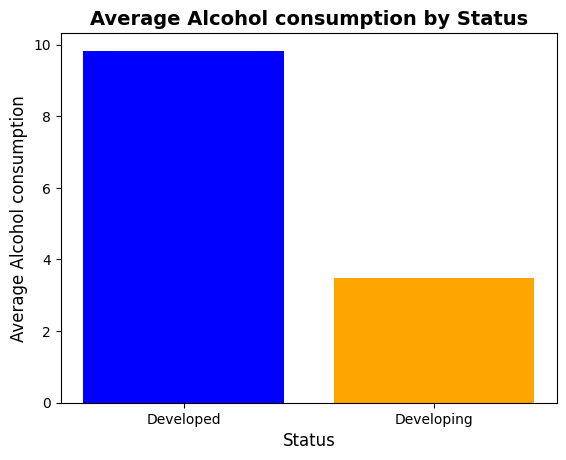

In [20]:
# 'Status' sütununa göre gruplayalım ve alkol tüketiminin ortalamasını hesaplayalım
status_alcohol_mean = df.groupby('Status', as_index=False)['Alcohol'].mean()

# Çubuk grafiğini çizelim
plt.bar(status_alcohol_mean['Status'], status_alcohol_mean['Alcohol'], color=['blue', 'orange'])

# Başlık ve etiketler belirleyelim
plt.title('Average Alcohol consumption by Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Alcohol consumption', fontsize=12)

# Grafiği gösterelim
plt.show()

**Gelişmiş ve Gelişmekte Olan Ülkelere Göre Alkol Kullanımı. Gelişmiş ülkelerde alkol kullanımının fazla olduğu görülmektedir.**

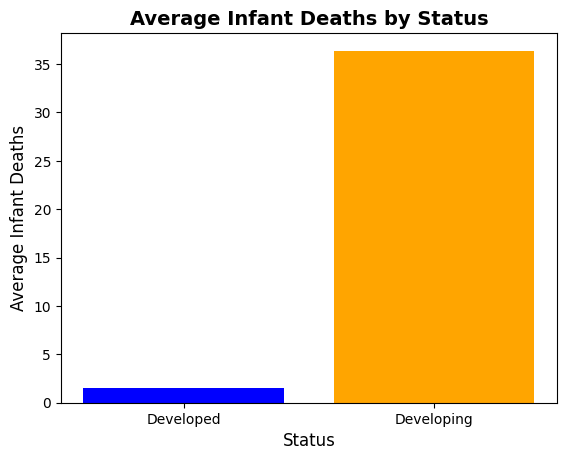

In [21]:
# 'Status' sütununa göre gruplayalım ve bebek ölümlerinin ortalamasını hesaplayalım
infant_deaths_mean = df.groupby('Status', as_index=False).agg({'infant deaths':'mean'})

# Çubuk grafiğini çizelim
plt.bar(infant_deaths_mean['Status'], infant_deaths_mean['infant deaths'], color=['blue', 'orange'])

# Başlık ve etiketler belirleyelim
plt.title('Average Infant Deaths by Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Infant Deaths', fontsize=12)

# Grafiği gösterelim
plt.show()

**Gelişmiş ve gelişmekte olan ülkelerde bebek ölümleri görülme olasılığı görülmektedir. Gelişmekte olan ülkelerde bu oran çok daha fazladır.**

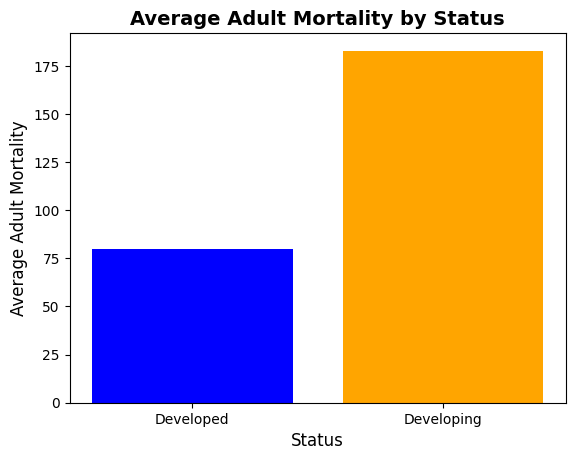

In [22]:
# 'Status' sütununa göre gruplayalım ve yetişkin ölümlerinin ortalamasını hesaplayalım
adult_mortality_mean = df.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'})

# Çubuk grafiğini çizelim
plt.bar(adult_mortality_mean['Status'], adult_mortality_mean['Adult Mortality'], color=['blue', 'orange'])

# Başlık ve etiketler belirleyelim
plt.title('Average Adult Mortality by Status', fontsize=14, fontweight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Average Adult Mortality', fontsize=12)

# Grafiği gösterelim
plt.show()

**Gelişmiş ve Gelişmekte olan ülkelerde Yetişkin Ölümleri görülme olasılıkları görülmektedir. Gelişmekte olan ülkelerde bu oran gelişmiş ülkelere göre yine daha fazladır.**

**Korelasyonu ve çoklu doğrusallığı yorumlamak için ısı haritasıyla korelasyon**

High correlation (-0.70) between: ('Adult Mortality', 'Life expectancy ')
Very high correlation (1.00) between: ('under-five deaths ', 'infant deaths')
High correlation (0.61) between: ('Diphtheria ', 'Hepatitis B')
High correlation (0.67) between: ('Diphtheria ', 'Polio')
Very high correlation (0.90) between: ('GDP', 'percentage expenditure')
Very high correlation (0.94) between: (' thinness 5-9 years', ' thinness  1-19 years')
High correlation (0.72) between: ('Income composition of resources', 'Life expectancy ')
High correlation (0.75) between: ('Schooling', 'Life expectancy ')
Very high correlation (0.80) between: ('Schooling', 'Income composition of resources')
Highly correlated column pairs: [('Adult Mortality', 'Life expectancy '), ('under-five deaths ', 'infant deaths'), ('Diphtheria ', 'Hepatitis B'), ('Diphtheria ', 'Polio'), ('GDP', 'percentage expenditure'), (' thinness 5-9 years', ' thinness  1-19 years'), ('Income composition of resources', 'Life expectancy '), ('Schooli

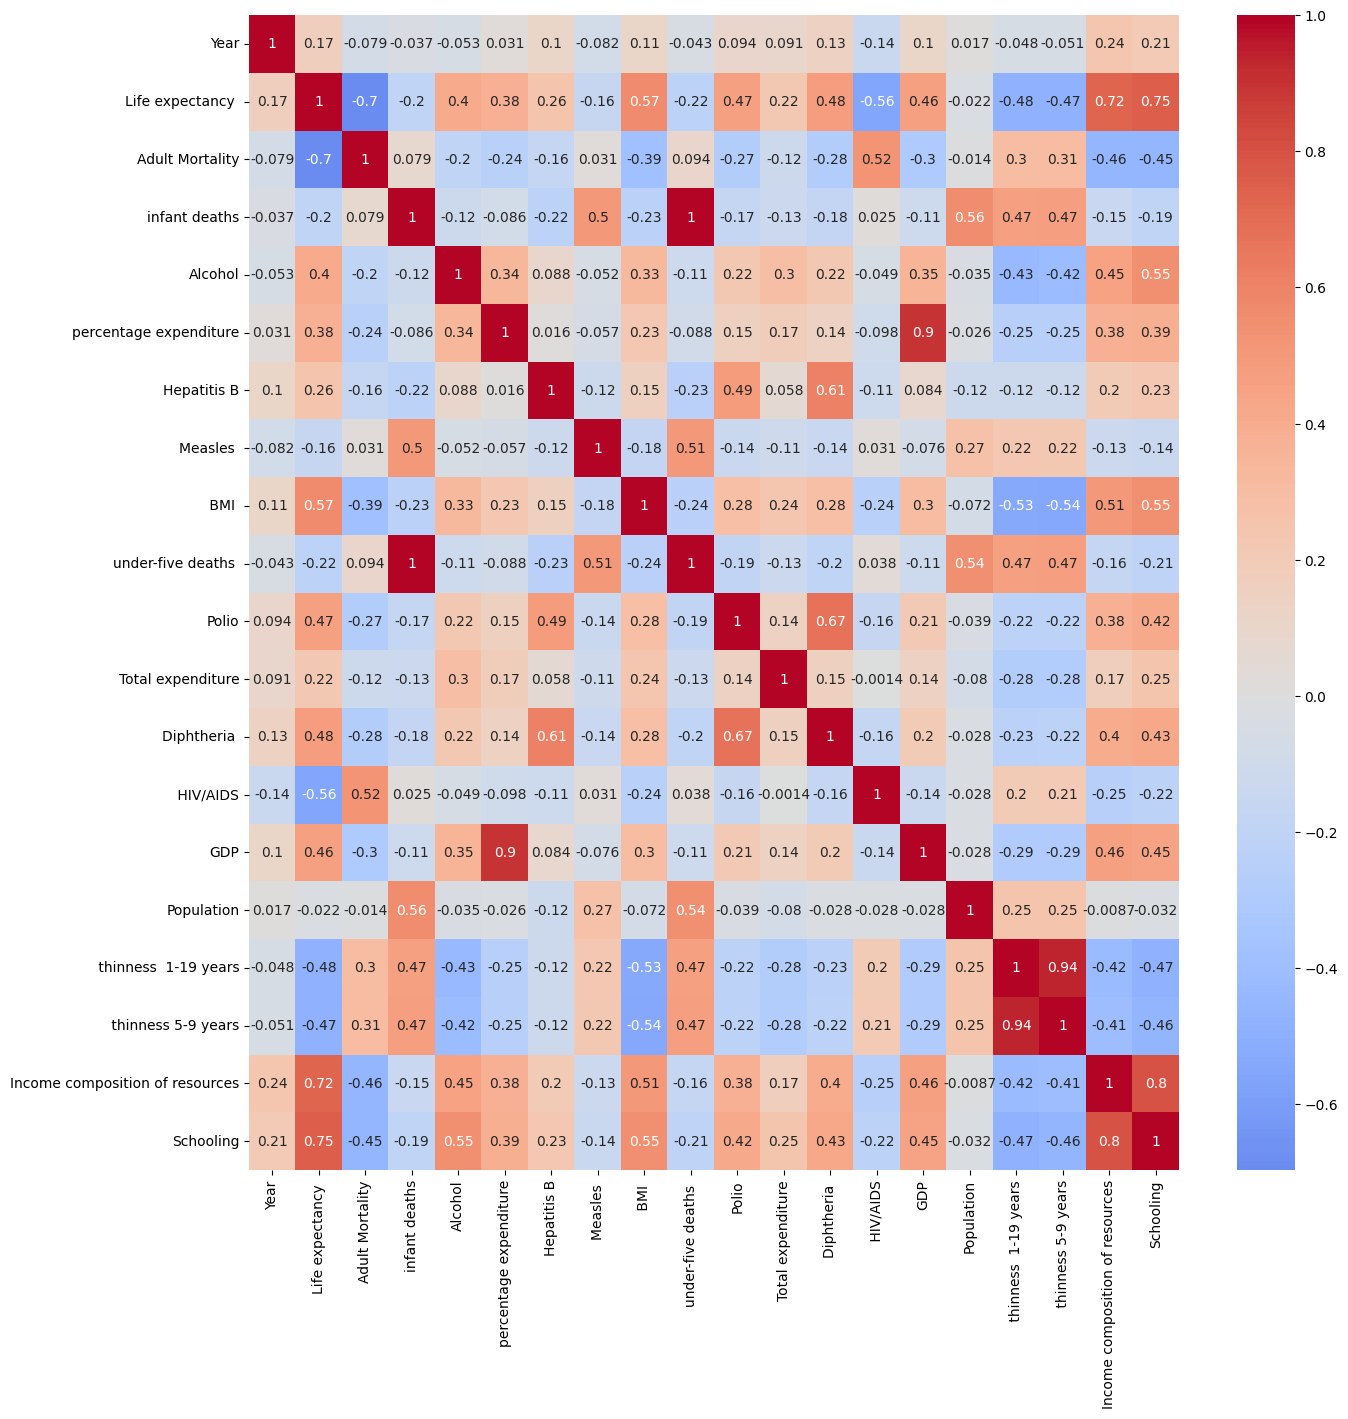

In [23]:
# Check for high correlation
def check_high_correlation(df):
    corr_matrix = df.corr()

    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= 0.8:
                col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                high_corr_pairs.append(col_pair)
                print(f"Very high correlation ({corr_value:.2f}) between: {col_pair}")
            elif 0.60 <= abs(corr_value) < 0.8:
                col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                high_corr_pairs.append(col_pair)
                print(f"High correlation ({corr_value:.2f}) between: {col_pair}")
            #elif 0.40 <= abs(corr_value) < 0.6:
             #   col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
              #  print(f"Moderate correlation ({corr_value:.2f}) between: {col_pair}")
            #elif 0.20 <= abs(corr_value) < 0.4:
             #   col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
              #  print(f"Weak correlation ({corr_value:.2f}) between: {col_pair}")
            #elif abs(corr_value) < 0.2:
             #   col_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
              #  print(f"Very weak or no correlation ({corr_value:.2f}) between: {col_pair}")
    return high_corr_pairs

high_corr_pairs = check_high_correlation(df.select_dtypes(include='number'))
print("Highly correlated column pairs:", high_corr_pairs)
# Plot correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", center=0)
plt.show()

**Isı haritasıyla yaptığımız korelasyonda çarpıcı özellikler öne çıkmaktadır. "bebek ölümleri - 5 yaş altı ölümler", "1-19 yaşları arasındaki zayıflık ve 5-9 yaşlar arasındaki zayıflık", "yüzde harcama ve  gsmh", "kaynakların gelir bileşimi - okullaşma" arasında çok yüksek korelasyon görülmektedir."Yetişkin ölümleri ve Yaşam beklentisi arasında da negatif yüksek bir korelasyon vardır.**

**Bazı Çaprazlamalar**

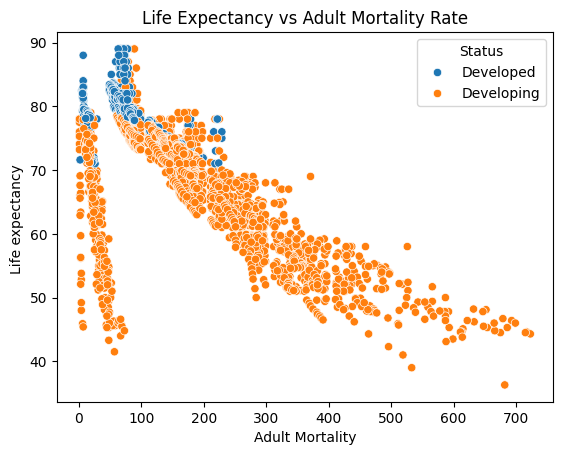

In [24]:
sns.scatterplot(data=df ,x='Adult Mortality' , y= 'Life expectancy ' ,hue='Status')
plt.title('Life Expectancy vs Adult Mortality Rate')
plt.show()

**Yaşam Beklentisi vs Yetişkin Ölümleri**
Çaprazlama grafiğinin Gelişmiş ve Gelişmekte olan ülkelere göre kıyası görülmektedir. Yaşam beklentisi Gelişmiş ülkelerde daha fazlayken, Yetişkin ölümleri de gelişmekte olan ülkelerde daha fazladır.

<Axes: xlabel='Adult Mortality', ylabel='percentage expenditure'>

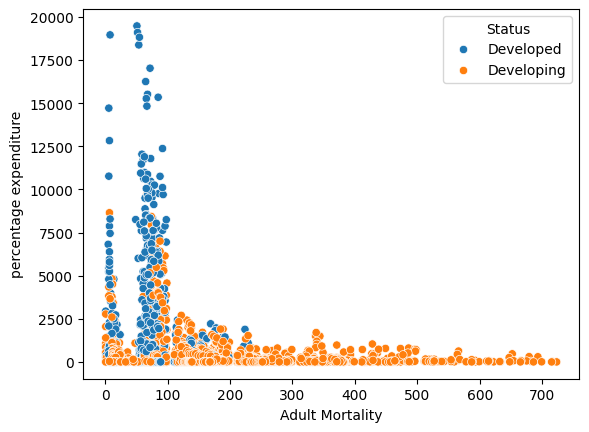

In [25]:
sns.scatterplot(data=df ,x='Adult Mortality' , y= 'percentage expenditure' ,hue='Status')

**Yetişkin Ölümleri gelişmekte olan ülkelerde daha fazlayken, Yüzdesel harcama gelişmiş ülkelerde daha fazladır. Bunu çapraz grafikten görebiliriz.**

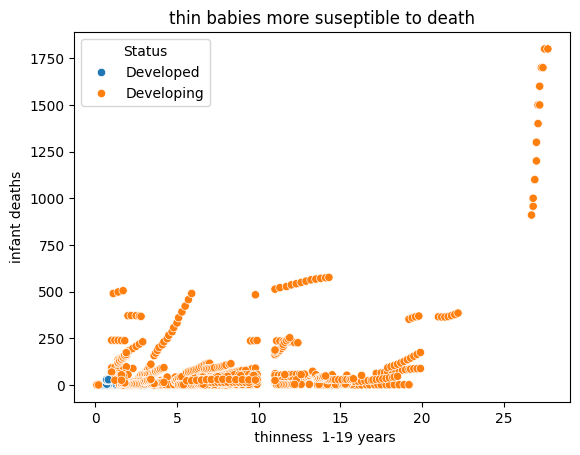

In [26]:
sns.scatterplot(data=df ,y='infant deaths' , x= ' thinness  1-19 years' ,hue='Status')
plt.title('thin babies more suseptible to death')
plt.show()

**Gelişmekte olan ülkelerde bebek ölümlerinin sayısı ve zayıflık derecesi arasında daha belirgin bir ilişki olduğu görülmektedir. Zayıflık derecesi arttıkça bebek ölümleri de artmaktadır.**

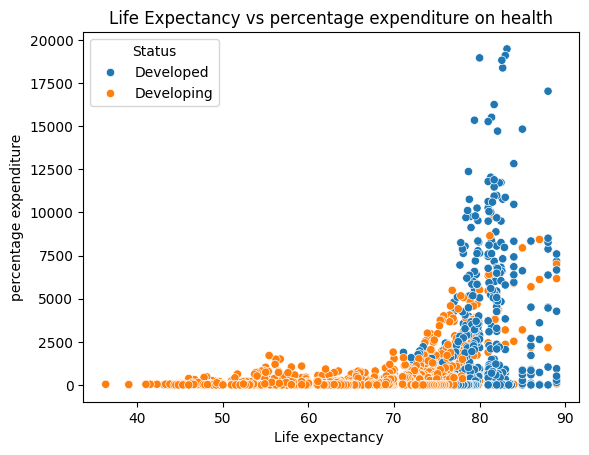

In [27]:
sns.scatterplot(data=df ,y='percentage expenditure' , x= 'Life expectancy ' ,hue='Status')
plt.title('Life Expectancy vs percentage expenditure on health')
plt.show()

**Grafik, sağlık harcamalarının yaşam beklentisi üzerinde önemli bir etkisi olduğunu göstermektedir. Gelişmiş ülkelerde sağlık harcaması daha yüksektir ve yaşam beklentisi daha fazladır. Gelişmekte olan ülkelerde sağlık harcamalarının ve yaşam beklentisinin az olduğu görülmektedir.**

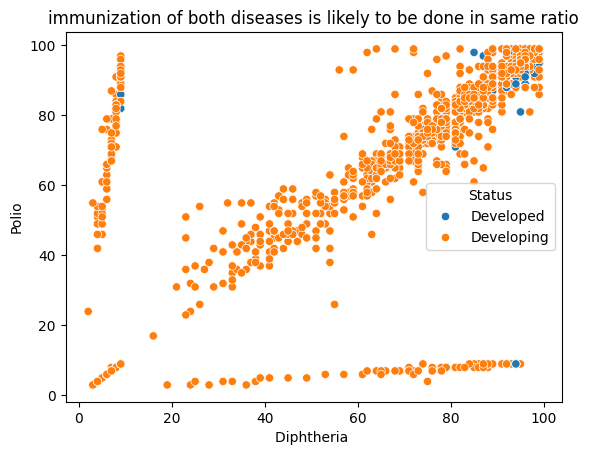

In [28]:
sns.scatterplot(data=df ,x='Diphtheria ' , y= 'Polio' ,hue='Status')
plt.title('immunization of both diseases is likely to be done in same ratio')
plt.show()

**Gelişmekte olan ülkelerde çocuk felci ve difteri görülme olasılıkları benzer ve daha fazladır.**

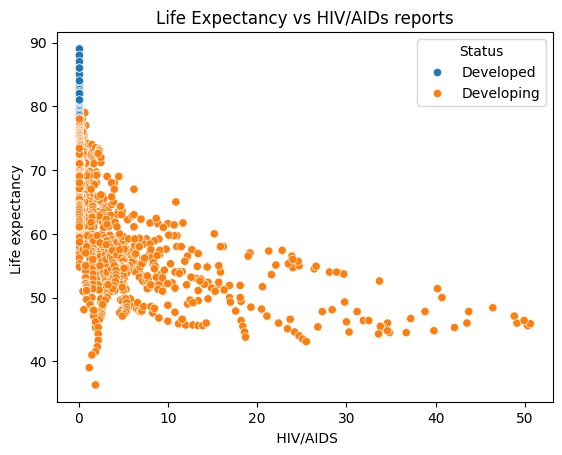

In [29]:
sns.scatterplot(data=df ,x=' HIV/AIDS' , y= 'Life expectancy ' ,hue='Status')
plt.title('Life Expectancy vs HIV/AIDs reports')
plt.show()

**Grafik, HIV/AIDS raporlarının sayısı arttıkça yaşam beklentisinin azaldığını göstermektedir. Gelişmiş ülkelerde HIV/AIDS oranı çok düşük olup, bu ülkelerde yaşam beklentisi daha yüksektir. Gelişmekte olan ülkelerde ise HIV/AIDS görülme olasılığı daha yüksektir ve bu durum yaşam beklentisinin daha düşük olmasına neden olmaktadır. HIV/AIDS hastalığının yaygınlığı, yaşam beklentisini olumsuz etkileyen önemli bir faktördür.**

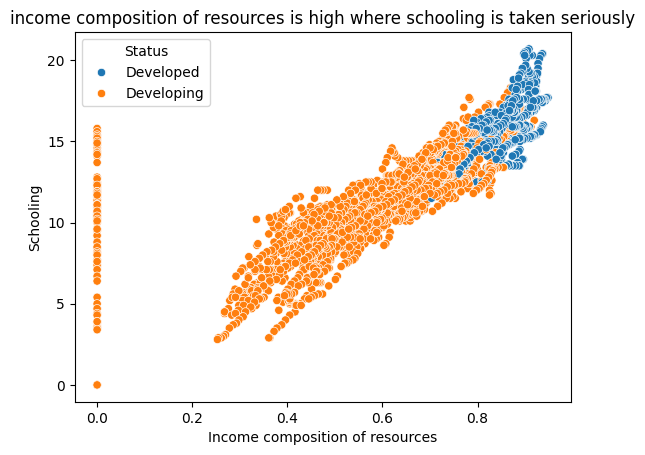

In [30]:
sns.scatterplot(data=df ,x='Income composition of resources' , y= 'Schooling' ,hue='Status')
plt.title('income composition of resources is high where schooling is taken seriously')
plt.show()

**Öğrenim gördüğü yıl ve Kaynakların gelir bileşimi hem gelişmiş hem de gelişmekte olan ülkelerde birbirleriyle doğru orantılıdır fakat gelişmiş ülkelerde bu oranlar çok daha fazladır.**

# **Eksik Değer Analizi**

In [31]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [32]:
#Eksik Değerlerin Yüzdesel Oranı, shape[0] = verideki gözlem birimleri sayısı
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

Eksik değerlerin yüzdelik oranları aşırı yüksek çıkmadığı için hiçbir sütunu silmiyoruz.


**KNNImputer, eksik değerleri tahmin etmek için K-en yakın komşu (K-Nearest Neighbors) algoritmasını kullanan bir veri doldurma yöntemidir. Bu yöntem, eksik değerleri, benzer özelliklere sahip diğer gözlemlerin değerlerini kullanarak tahmin eder.**
 Örneğin, "Adult Mortality" (Yetişkin Ölüm Oranı) sütunu için eksik bir değeriniz varsa, bu sütunun diğer özelliklerle (örneğin, "Life expectancy", "Alcohol", "Hepatitis B" vb.) olan ilişkisi göz önüne alınarak benzer gözlemlerin değerleri kullanılarak eksik değeri tahmin edilebilir.

**Veri Setimizde kategorik olup da eksik olan değer yok. Eğer olsaydı, bunu mod ile doldurarak yapabilirdik.**

In [33]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

for i in num_cols:
  df[i] = impute.fit_transform(df[[i]])

In [34]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**Tekrar eden satırlar var mı diye kontrol ediyoruz. Çünkü bu veriyi olumsuz etkiler.**

In [35]:
df.duplicated().sum()

# tekrar eden gözlem birimleri sayısı

0

#**AYKIRI DEĞER ANALİZİ**

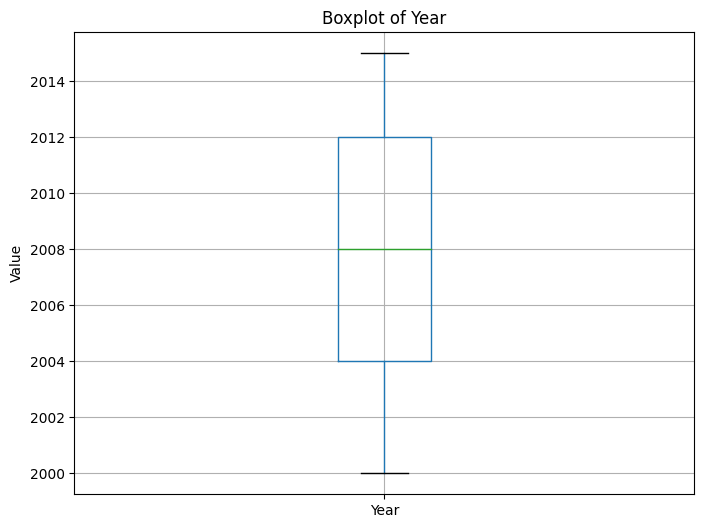

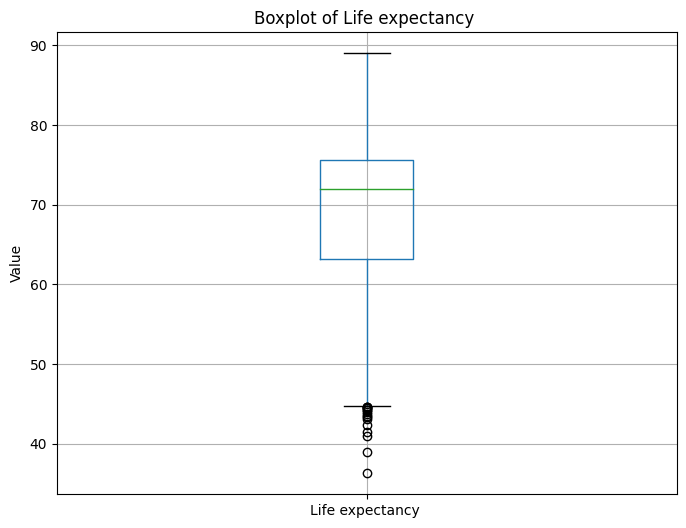

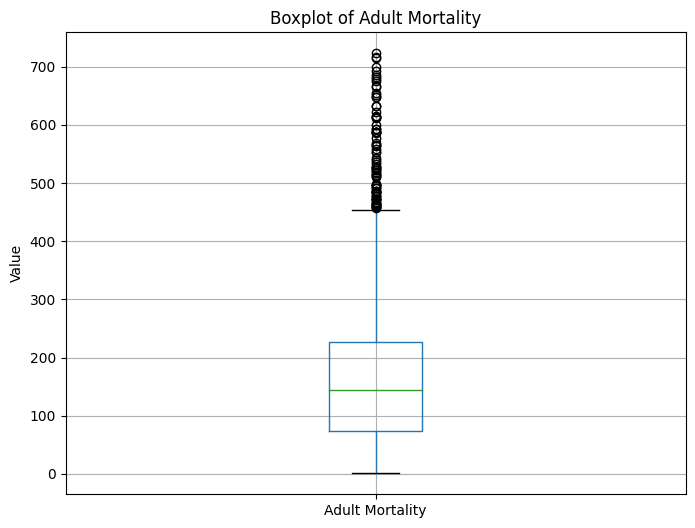

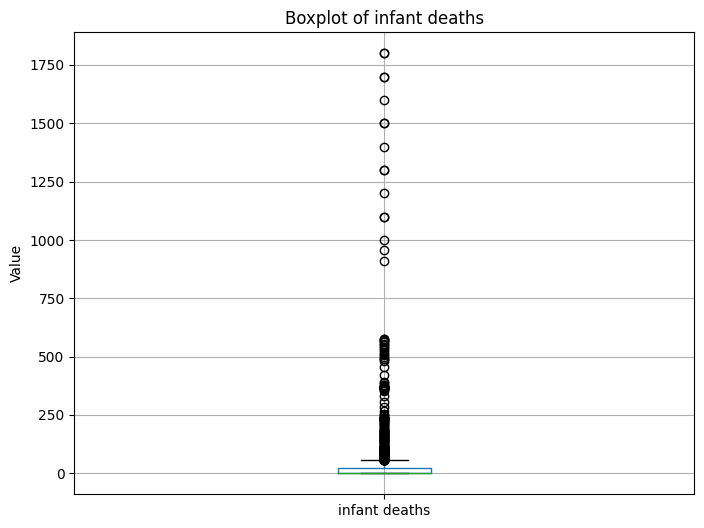

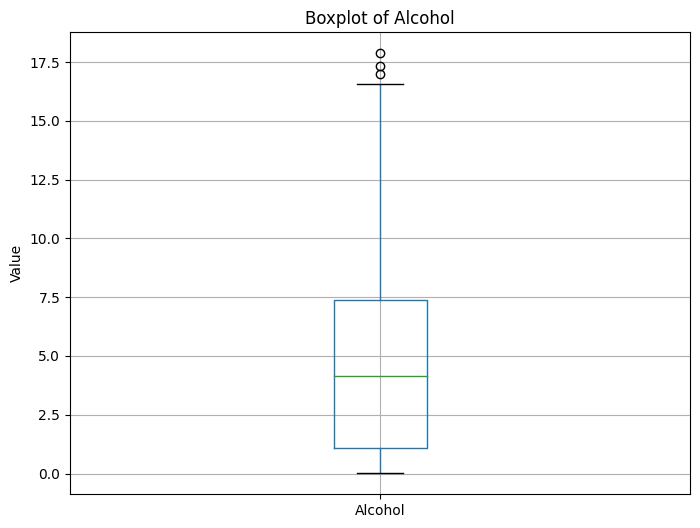

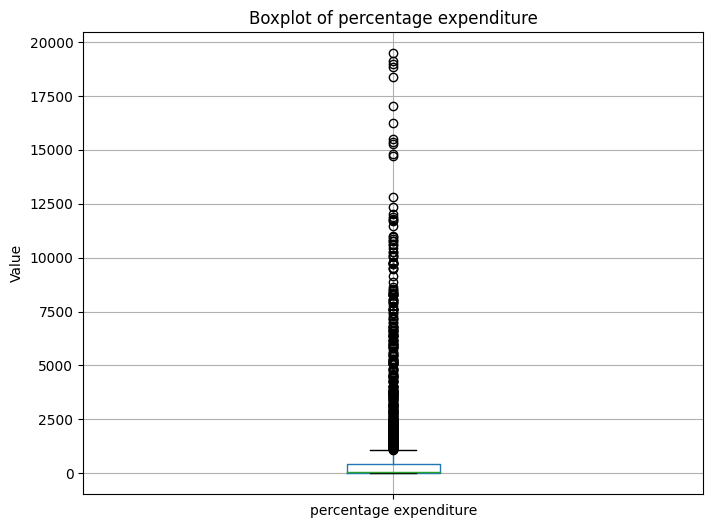

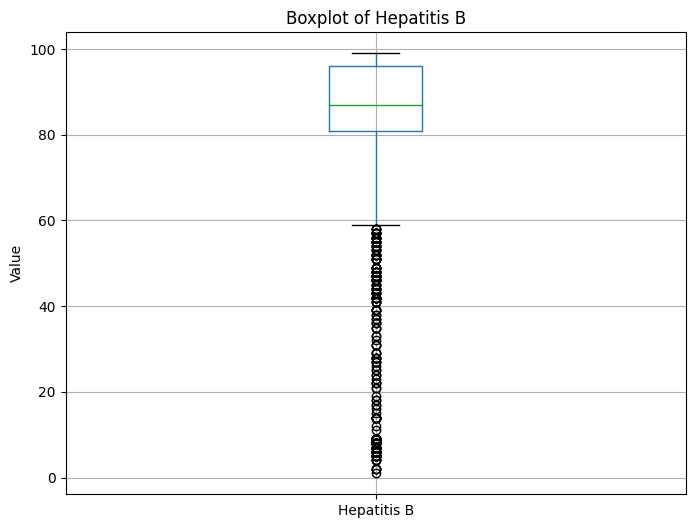

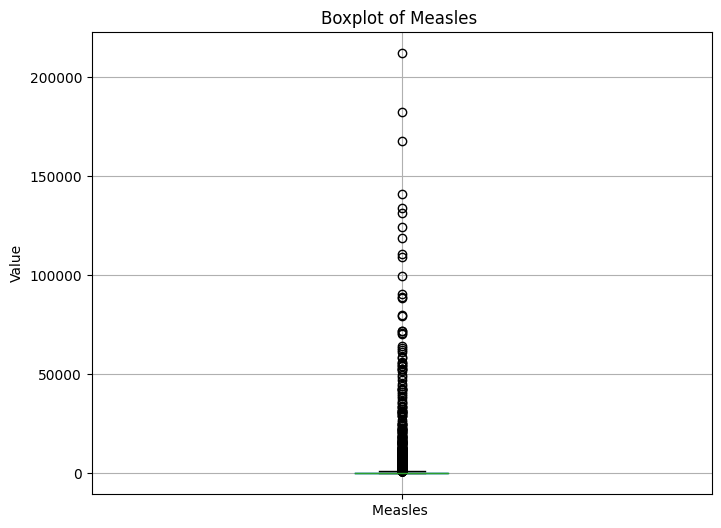

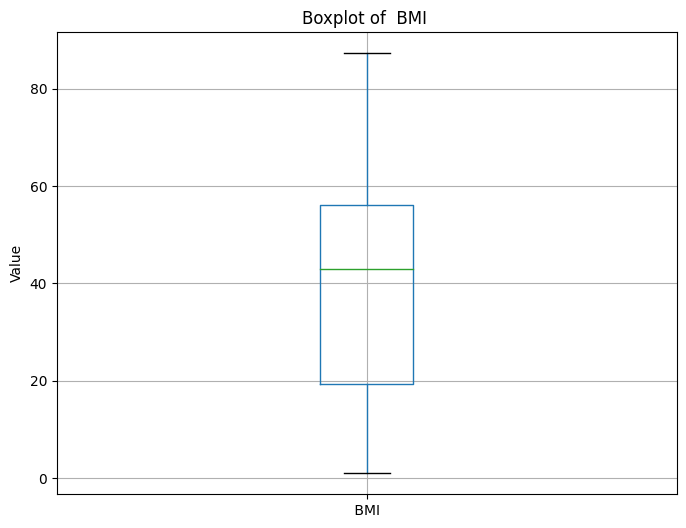

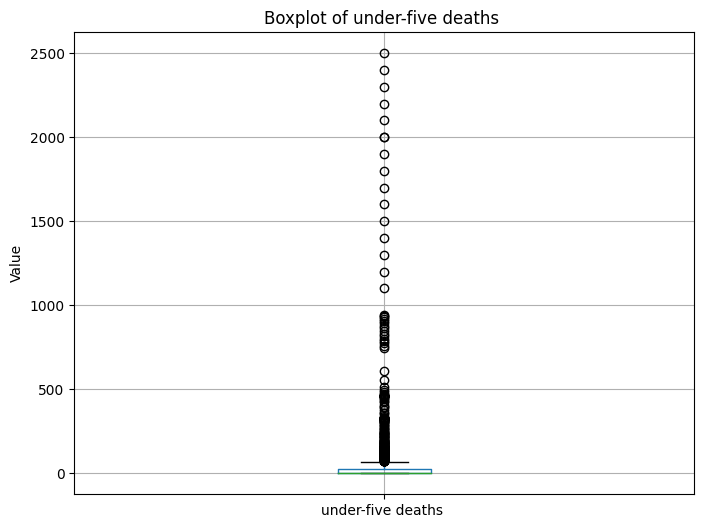

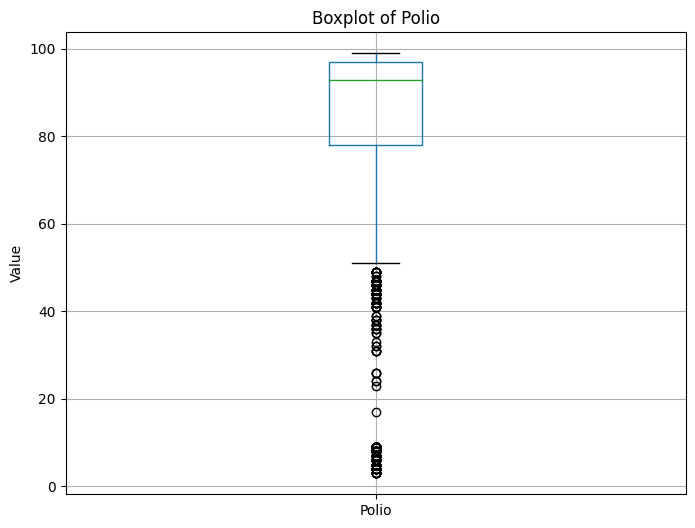

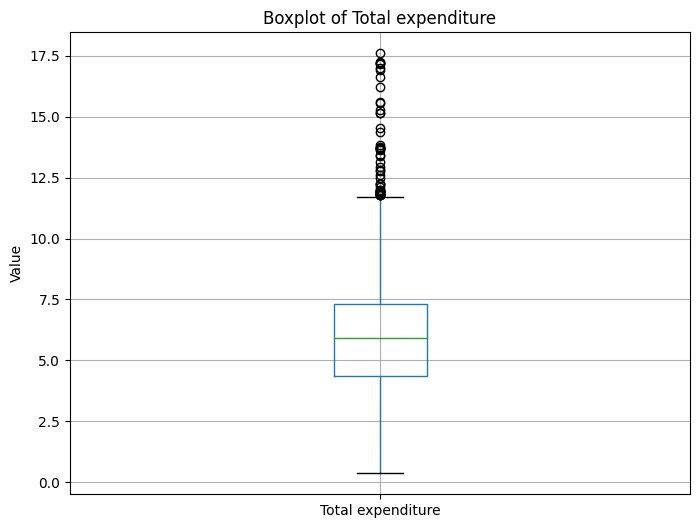

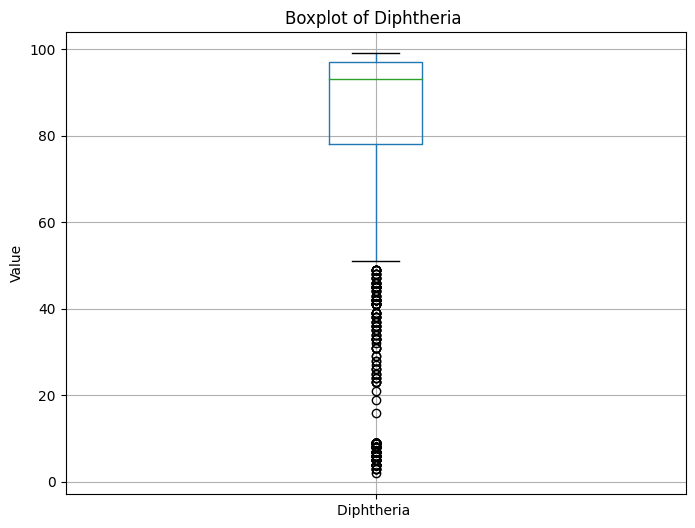

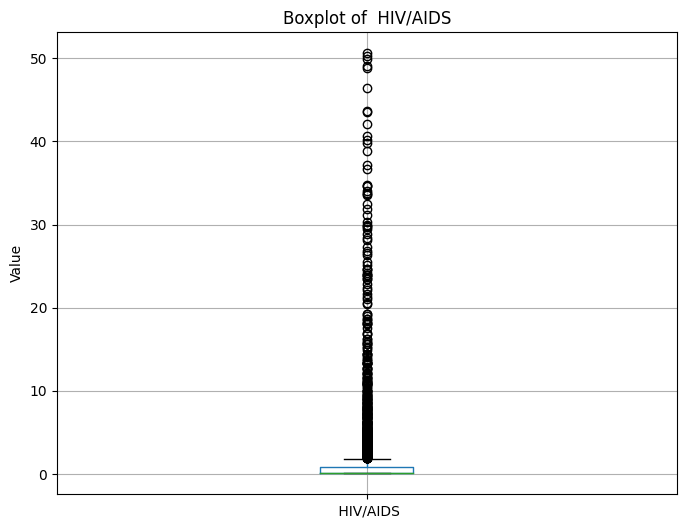

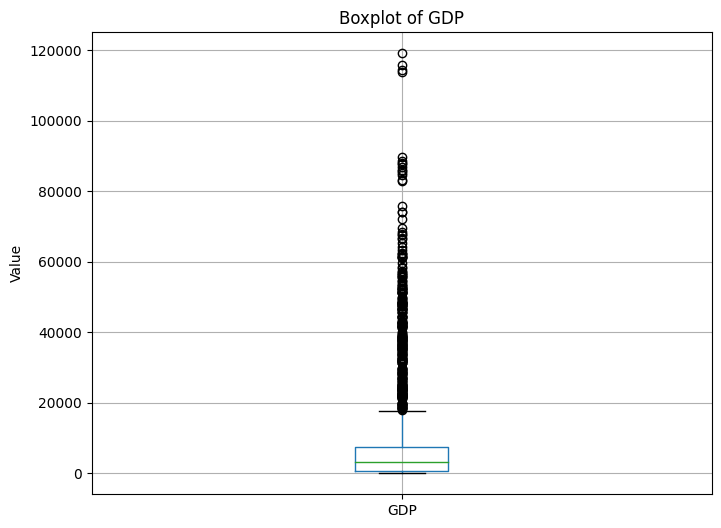

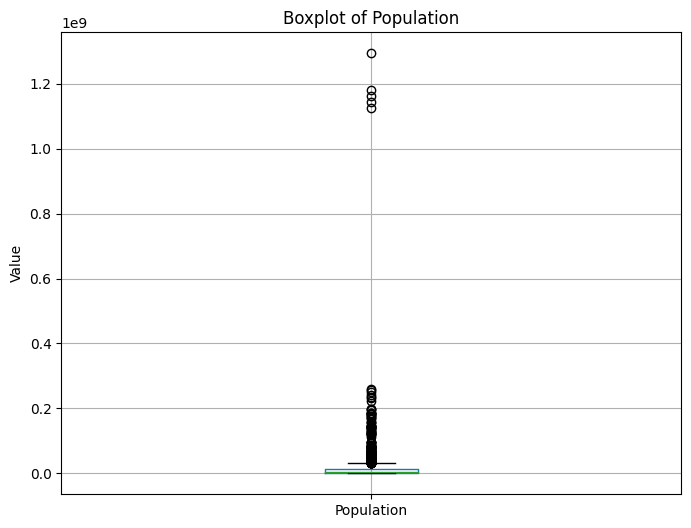

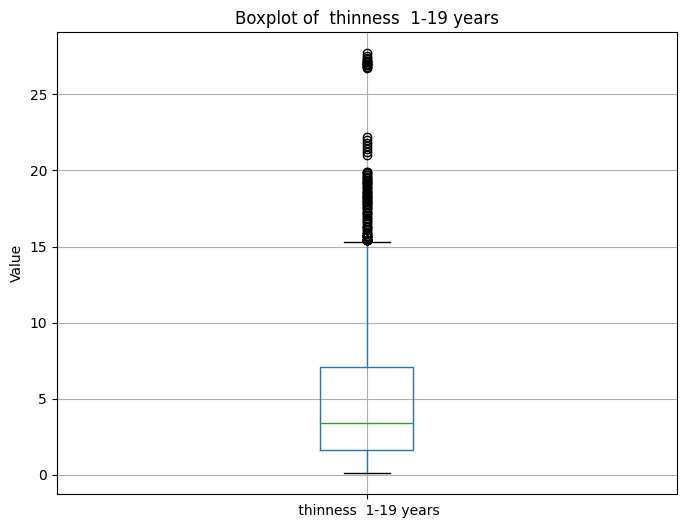

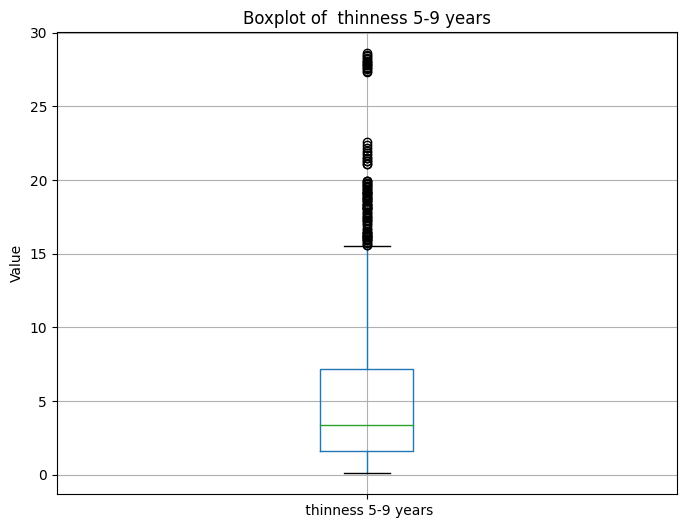

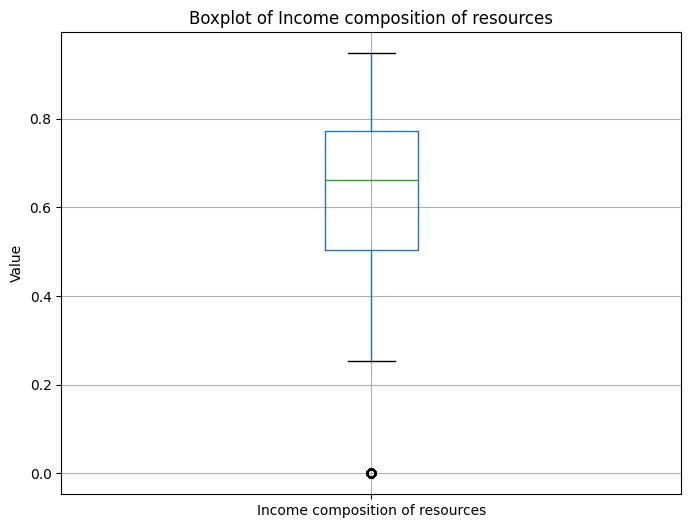

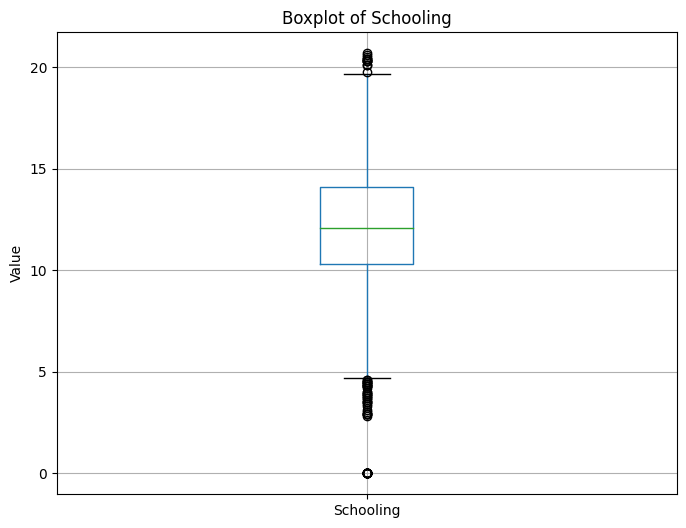

In [36]:
import matplotlib.pyplot as plt

# Sayısal sütunlar için boxplot çizimi
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel('Value')
        plt.show()

# Örnek kullanım
plot_boxplots(df)

**Z SCORE İLE AYKIRI DEĞER TESPİTİ**

In [37]:
#Z puanı, bir veri noktasının ortalama değerden ne kadar uzak olduğunu belirlemek için kullanılan bir ölçüdür.
from scipy import stats

def detect_outliers_zscore(df, column):
    z_scores = stats.zscore(df[column])
    outliers = df[(z_scores < -3) | (z_scores > 3)]
    return outliers

# Aykırı değerleri tespit etme
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Sayısal sütunlar için
        outliers = detect_outliers_zscore(df, column)
        if not outliers.empty:
            outlier_percentage = len(outliers) / len(df) * 100
            print(f"{column} sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: {outlier_percentage:.2f}%")
        else:
            print(f"{column} sütununda aykırı değer bulunmamaktadır.")
        print("**********************************************")


Year sütununda aykırı değer bulunmamaktadır.
**********************************************
Life expectancy  sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 0.07%
**********************************************
Adult Mortality sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 1.36%
**********************************************
infant deaths sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 1.26%
**********************************************
Alcohol sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 0.17%
**********************************************
percentage expenditure sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 2.86%
**********************************************
Hepatitis B sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 5.48%
**********************************************
Measles  sütununda aykırı değerler bulunmaktadır. Aykırı değer yüzdesi: 1.63%
********************************************

**IQR İLE AYKIRI DEĞER TESPİTİ**

In [38]:
# Define the outlier detection functions
def outlier_thresholds(df, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    print(f"{col_name}: Q1 = {quartile1}, Q3 = {quartile3}, IQR = {interquantile_range}, lower limit = {low_limit}, upper limit = {up_limit}")
    return low_limit, up_limit

def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    outliers = df[(df[col_name] > up_limit) | (df[col_name] < low_limit)]
    if outliers.any(axis=None):
        print(f"Outliers detected in column {col_name}:")
        print(outliers)
        return True
    print(f"No outliers detected in column {col_name}")
    return False

# Check for outliers in numeric columns
def check_all_numeric_columns_for_outliers(df):
    outlier_columns = []
    numeric_columns = df.select_dtypes(include=['number']).columns
    for col in numeric_columns:
        print(f"Checking column: {col}")
        if check_outlier(df, col):
            outlier_columns.append(col)
    return outlier_columns

**AYKIRI DEĞERLER TEMİZLENDİ Mİ DİYE BAKIYORUZ**

In [39]:
def clean_outliers(df, col_name, q1=0.25, q3=0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    # Aykırı değerlerin temizlenmesi
    df.loc[df[col_name] > up_limit, col_name] = quartile3
    df.loc[df[col_name] < low_limit, col_name] = quartile1

# Aykırı değerleri temizleme işlemi
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        clean_outliers(df, column)
        print(column, "sütunundaki aykırı değerler temizlendi.")


Year sütunundaki aykırı değerler temizlendi.
Life expectancy  sütunundaki aykırı değerler temizlendi.
Adult Mortality sütunundaki aykırı değerler temizlendi.
infant deaths sütunundaki aykırı değerler temizlendi.
Alcohol sütunundaki aykırı değerler temizlendi.
percentage expenditure sütunundaki aykırı değerler temizlendi.
Hepatitis B sütunundaki aykırı değerler temizlendi.
Measles  sütunundaki aykırı değerler temizlendi.
 BMI  sütunundaki aykırı değerler temizlendi.
under-five deaths  sütunundaki aykırı değerler temizlendi.
Polio sütunundaki aykırı değerler temizlendi.
Total expenditure sütunundaki aykırı değerler temizlendi.
Diphtheria  sütunundaki aykırı değerler temizlendi.
 HIV/AIDS sütunundaki aykırı değerler temizlendi.
GDP sütunundaki aykırı değerler temizlendi.
Population sütunundaki aykırı değerler temizlendi.
 thinness  1-19 years sütunundaki aykırı değerler temizlendi.
 thinness 5-9 years sütunundaki aykırı değerler temizlendi.
Income composition of resources sütunundaki aykı

**AYKIRI DEĞERLERİN TEMİZLENDİĞİNİ BOXPLOT İLE GÖREBİLİYORUZ**

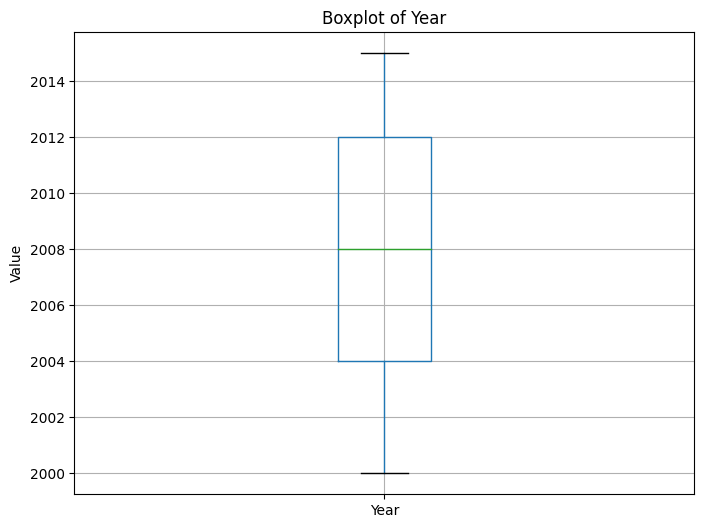

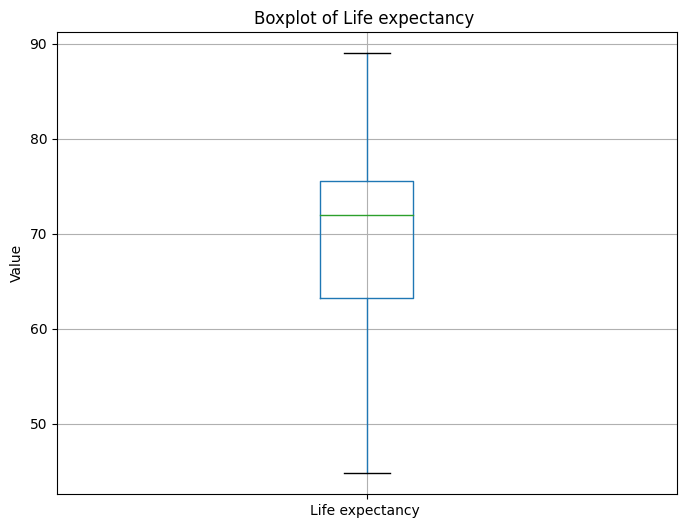

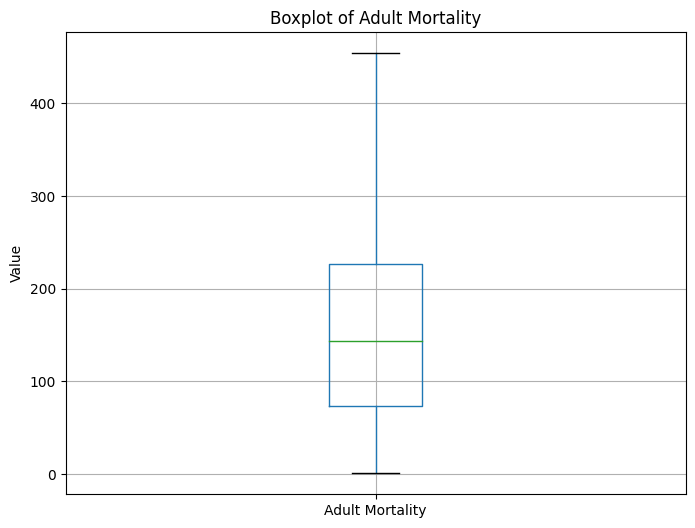

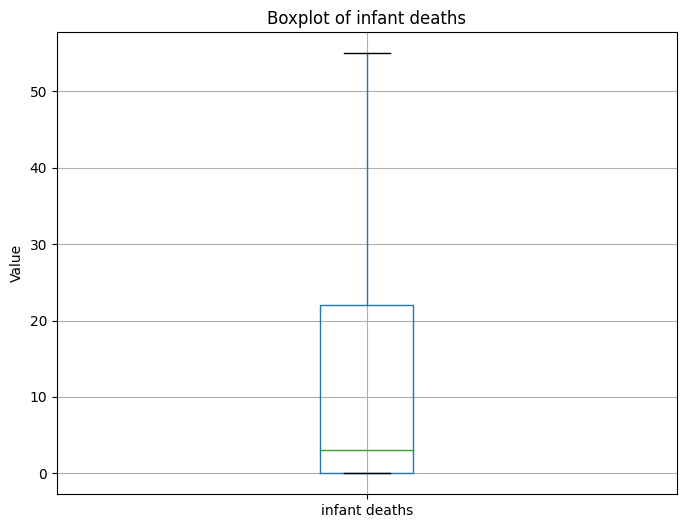

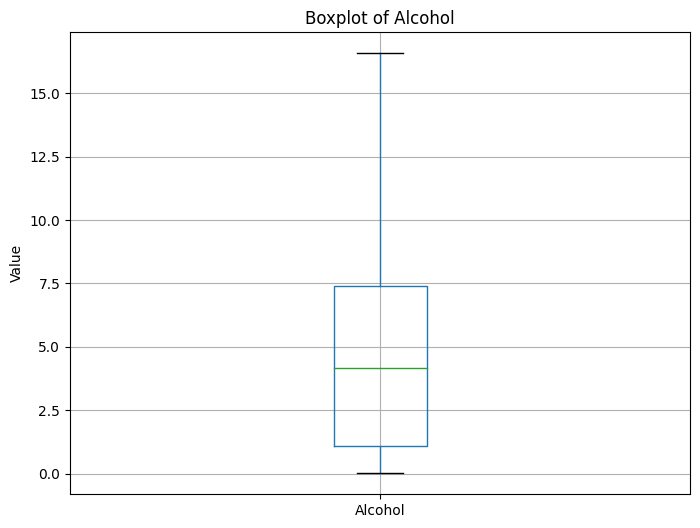

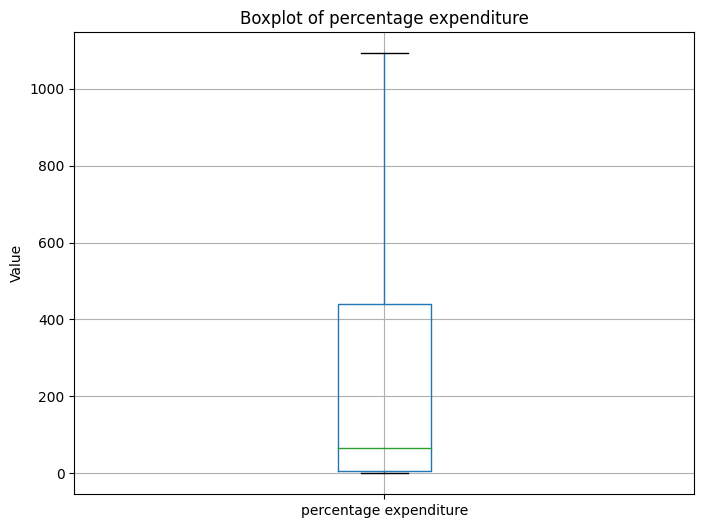

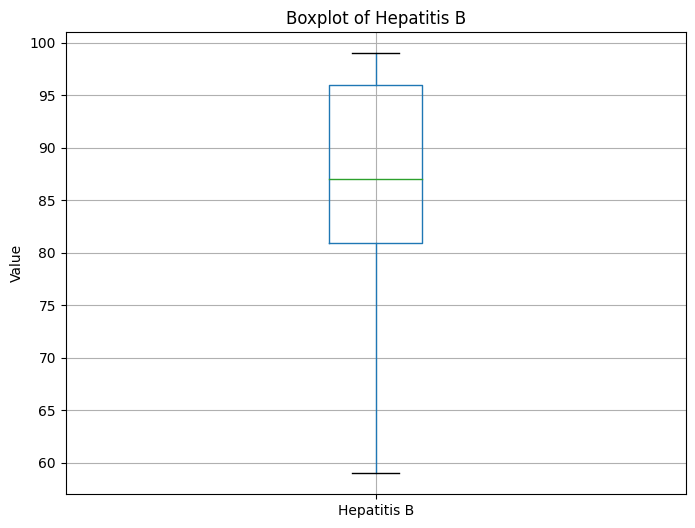

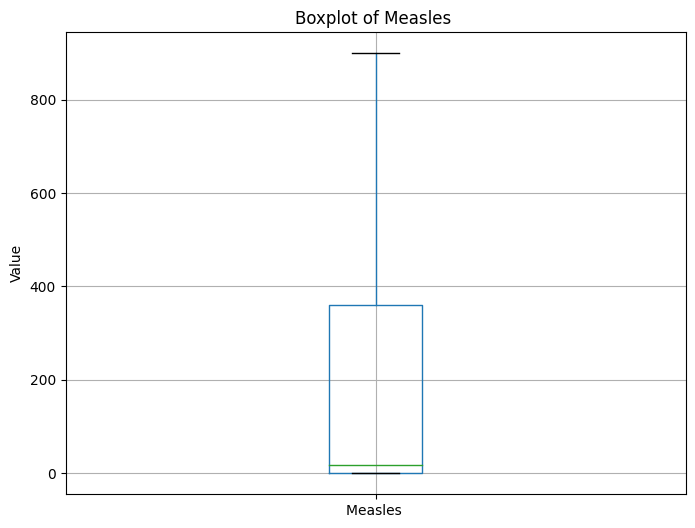

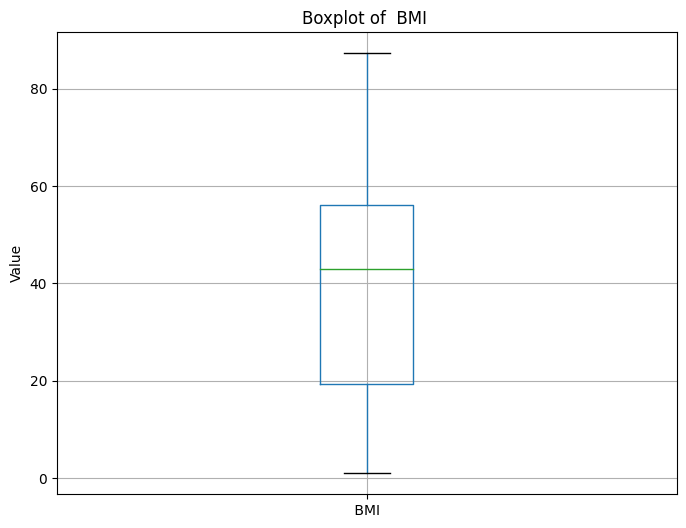

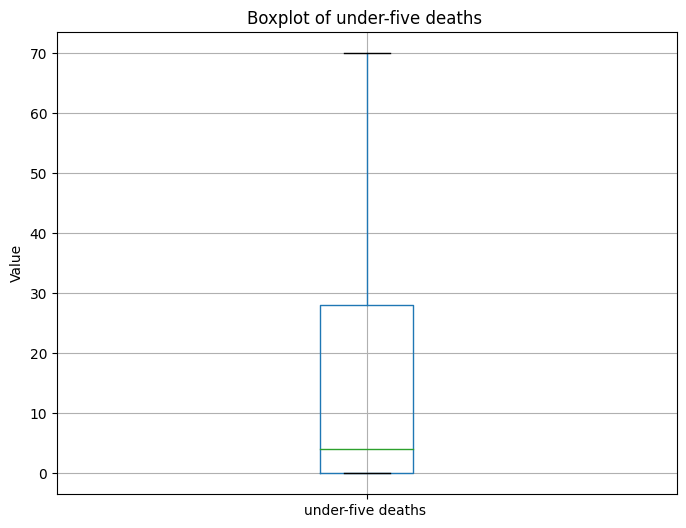

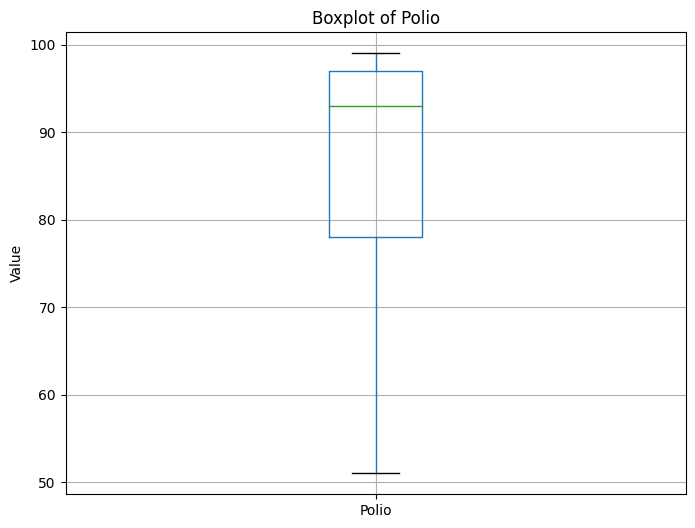

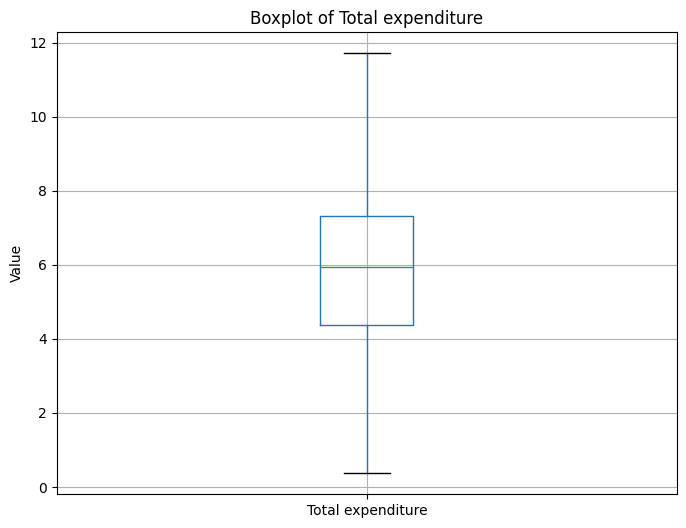

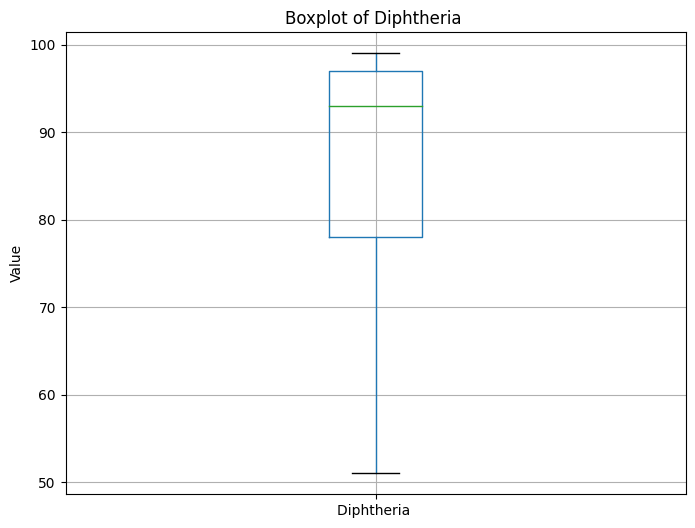

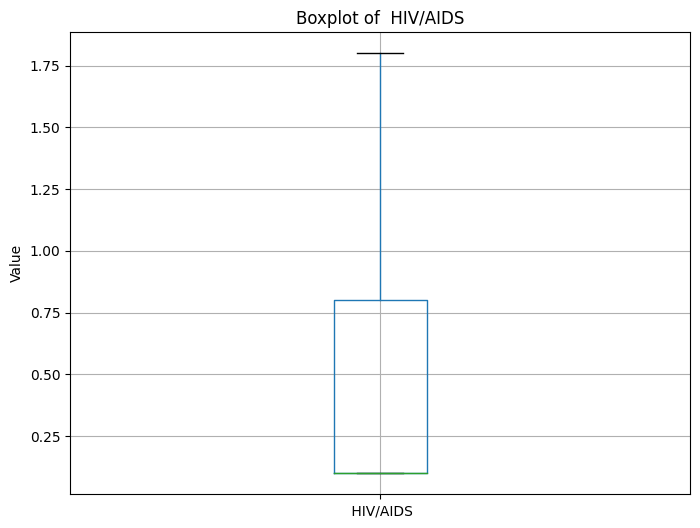

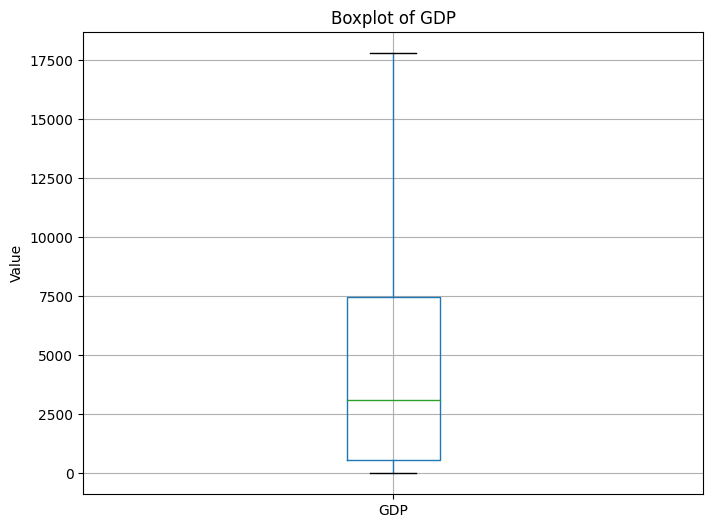

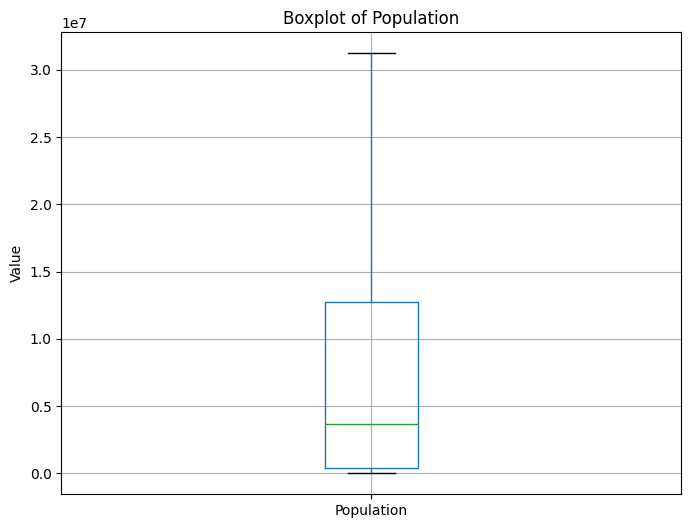

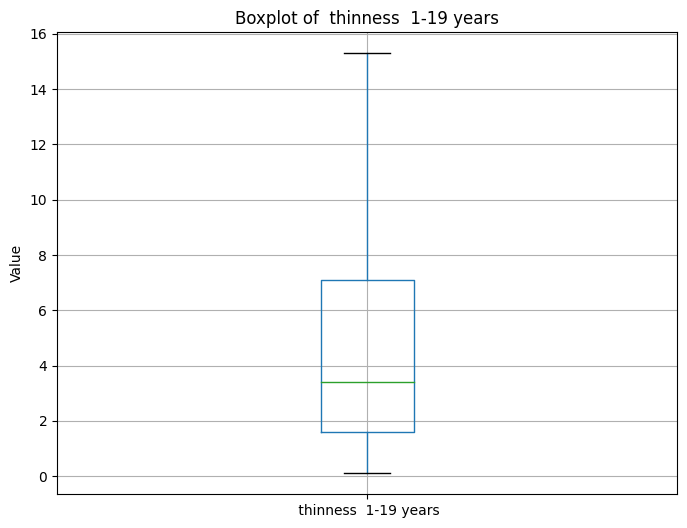

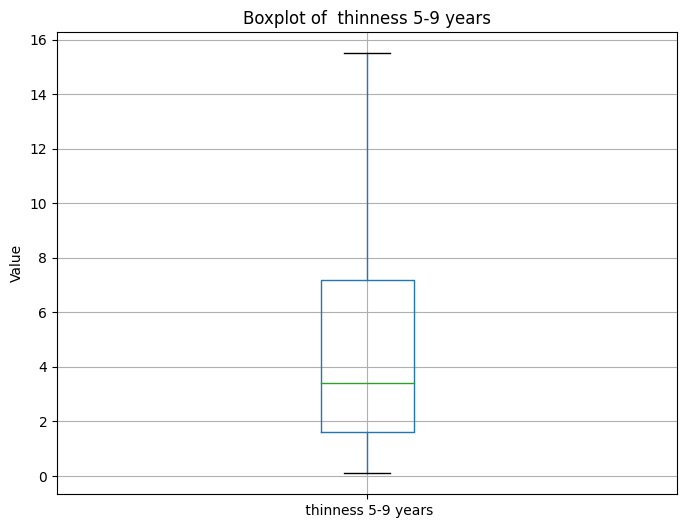

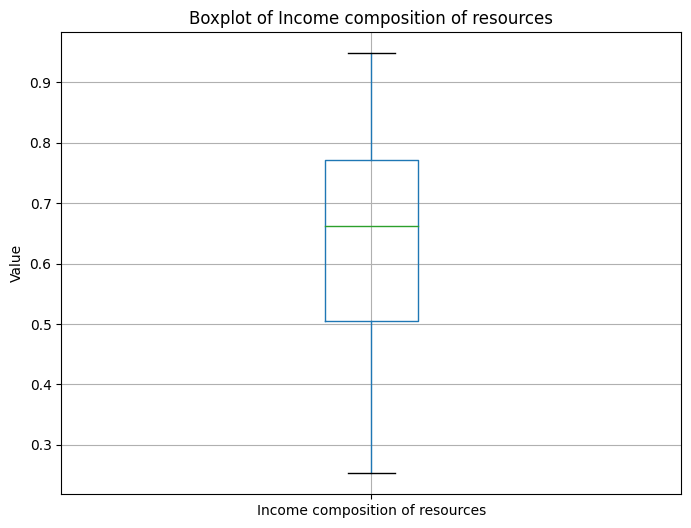

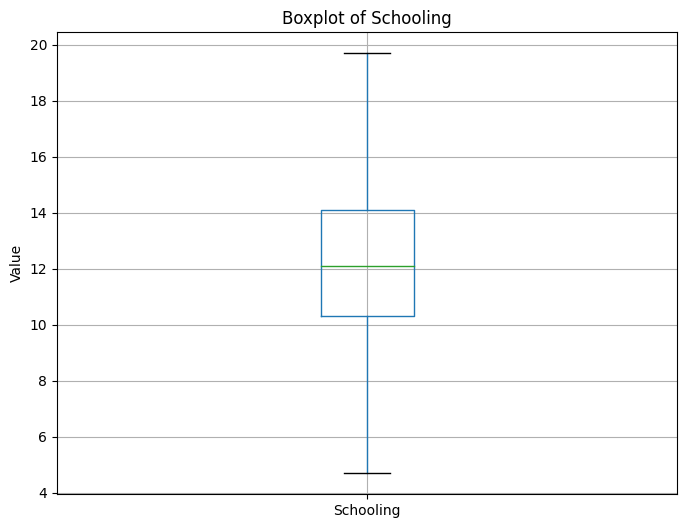

In [40]:
import matplotlib.pyplot as plt

# Sayısal sütunlar için boxplot çizimi
def plot_boxplots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel('Value')
        plt.show()

# Örnek kullanım
plot_boxplots(df)

#**ONE HOT ENCODING**

One-hot encoding her bir kategoriyi ayrı bir sütun olarak temsil ederken label encoding her kategoriyi bir tamsayı ile temsil eder. Özellikle, kategoriler arasında doğal bir sıralama varsa veya kategorik değişken sıralı bir yapıya sahipse label encoding kullanılabilir. One-hot encoding, kategoriler arasında herhangi bir sıralama olmadığını belirtir

In [41]:
#kategorik verilerin sayısal formata dönüştürülmesi one-hot
pd.get_dummies(data=df, columns=["Country", "Status"], drop_first=True)


Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0     2015.0              65.0            263.0           22.0     0.01   
1     2014.0              59.9            271.0           22.0     0.01   
2     2013.0              59.9            268.0           22.0     0.01   
3     2012.0              59.5            272.0           22.0     0.01   
4     2011.0              59.2            275.0           22.0     0.01   
...      ...               ...              ...            ...      ...   
2933  2004.0              63.2            227.0           27.0     4.36   
2934  2003.0              63.2            227.0           26.0     4.06   
2935  2002.0              44.8             73.0           25.0     4.43   
2936  2001.0              45.3            227.0           25.0     1.72   
2937  2000.0              46.0            227.0           24.0     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624    65.000000    360.25   19.1   
1                  73.523582    62.000000    492.00   18.6   
2                  73.219243    64.000000    430.00   18.1   
3                  78.184215    67.000000    360.25   17.6   
4                   7.097109    68.000000    360.25   17.2   
...                      ...          ...       ...    ...   
2933                0.000000    68.000000     31.00   27.1   
2934                0.000000    80.940461    360.25   26.7   
2935                0.000000    73.000000    304.00   26.3   
2936                0.000000    76.000000    529.00   25.9   
2937                0.000000    79.000000    360.25   25.5   

      under-five deaths   ...  Country_United States of America  \
0                   28.0  ...                             False   
1                   28.0  ...                             False   
2                   28.0  ...                             False   
3                   28.0  ...                             False   
4                   28.0  ...                             False   
...                  ...  ...                               ...   
2933                42.0  ...                             False   
2934                41.0  ...                             False   
2935                40.0  ...                             False   
2936                39.0  ...                             False   
2937                39.0  ...                             False   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0               False               False            False   
1               False               False            False   
2               False               False            False   
3               False               False            False   
4               False               False            False   
...               ...                 ...              ...   
2933            False               False            False   
2934            False               False            False   
2935            False               False            False   
2936            False               False            False   
2937            False               False            False   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                          False             False   
1                                          False             False   
2                                          False             False   
3                                          False             False   
4                                          False             False   
...                                          ...               ...   
2933                                       False             False   
2934                                       False             False   
2935                                       False             False   
2936                                       False             False   
2937                                      

In [42]:
df.shape

(2938, 22)

In [43]:
dummy = pd.get_dummies(data=df, columns=["Country", "Status"], drop_first=True)

In [44]:
dummy.shape

(2938, 213)

#**VERİ ÖLÇEKLENDİRME İŞLEMİ**

Veri ölçeklendirme işlemi, verilerimizi bir standart ölçeğe getirerek makine öğrenimi modelleri için daha iyi sonuçlar elde etmemizi sağlar.

(Normalization, Standardization, Min-Max Scaling, Robust Scaling vs.)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Sayısal sütunları min-max ölçekleyiciye uygun hale getirelim
dummy[num_cols] = scaler.fit_transform(dummy[num_cols])

In [ ]:
dummy.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  1.000000          0.457014         0.578366            0.4      0.0   
1  0.933333          0.341629         0.596026            0.4      0.0   
2  0.866667          0.341629         0.589404            0.4      0.0   
3  0.800000          0.332579         0.598234            0.4      0.0   
4  0.733333          0.325792         0.604857            0.4      0.0   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0                0.065265        0.150  0.400723  0.209733   
1                0.067320        0.075  0.547275  0.203940   
2                0.067041        0.125  0.478309  0.198146   
3                0.071587        0.200  0.400723  0.192352   
4                0.006498        0.225  0.400723  0.187717   

   under-five deaths   ...  Country_United States of America  Country_Uruguay  \
0                 0.4  ...                             False            False   
1                 0.4  ...                             False            False   
2                 0.4  ...                             False            False   
3                 0.4  ...                             False            False   
4                 0.4  ...                             False            False   

   Country_Uzbekistan  Country_Vanuatu  \
0               False            False   
1               False            False   
2               False            False   
3               False            False   
4               False            False   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                       False             False   
1                                       False             False   
2                                       False             False   
3                                       False             False   
4                                       False             False   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  Status_Developing  
0          False           False             False               True  
1          False           False             False               True  
2          False           False             False               True  
3          False           False             False               True  
4          False           False             False               True  

[5 rows x 213 columns]